## `Problem Statement:`
- Mars Mission Control needs a good data-driven system for predicting Zeta Disease infection on the International Mars Colony.
- Use the `_zeta-disease_training-data_` dataset to build a model that can predict who will be infected by Zeta Disease.
- Apply the model to the `_zeta-disease_prediction-data_` dataset to predict who will be infected by Zeta Disease.

The dataset includes 9 columns with information on 800 people.
1.	age : in years
2.	weight : body weight in pounds (lbs)
3.	bmi : Body Mass Index (weight in kg/(height in m)2)
4.	blood_pressure : resting blood pressure (mm Hg)
5.	insulin_test : inuslin test value
6.	liver_stress_test : liver_stress_test value
7.	cardio_stress_test : cardio_stress_test value
8.	years_smoking : number of years of smoking
9.	zeta_disease :
              1 = yes;
              0 = no
-> zeta_disease is the Target Feature.

## `Load Required Libraries`:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision,Recall
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import pickle

In [2]:
#Load the Training and test data
train = pd.read_csv("2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv")
test = pd.read_csv("2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv")

In [3]:
print(f"Shape of training data:{train.shape}")
print(f"Shape of test data:{test.shape}")

Shape of training data:(800, 9)
Shape of test data:(20, 9)


In [4]:
#check the data
train.head(10)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0
5,49,158,27.0,80,0,0.3218,0,2,1
6,20,154,27.8,64,116,0.5168,53,0,0
7,37,167,34.5,88,145,0.4658,54,1,1
8,21,162,34.8,80,132,0.2798,75,1,0
9,19,186,31.2,70,0,1.2448,0,4,1


In [5]:
train.tail(10)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
790,25,152,35.7,90,0,0.7368,69,6,0
791,19,151,21.8,58,90,0.2178,65,2,0
792,56,239,30.1,60,846,0.4608,53,1,1
793,22,118,25.0,70,66,0.2498,62,2,0
794,46,176,38.5,88,108,0.4118,66,8,0
795,26,161,28.4,90,78,0.5578,42,3,0
796,37,165,33.7,60,0,0.3078,69,6,1
797,27,166,25.6,74,0,0.2638,0,5,0
798,109,139,28.1,66,94,0.2298,53,1,0
799,26,196,29.7,56,0,0.6268,0,1,0


In [6]:
#Check the null values if any
train.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

- We do not have any null values in the training data

In [7]:
#Check the metadata 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


### `Findings:`

- We have 800 rows and 9 columns.
- There is no null values
- The target column is zeta_disease


In [8]:
#check the basic statistics
train.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [9]:
#Check if the data is  balanced by checking the target variable distributions
train["zeta_disease"].value_counts(normalize = True)

0    0.65125
1    0.34875
Name: zeta_disease, dtype: float64

- __Data is moderately imbalance.__ 

In [10]:
#Check the statistics who have disease
train[train["zeta_disease"]==1].describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.0
mean,34.627240,192.960573,35.375627,70.806452,107.713262,0.632472,44.620072,5.164875,1.0
std,12.312951,30.167194,8.195067,21.124464,142.679082,0.414967,34.624280,4.692109,0.0
min,18.000000,128.000000,0.000000,0.000000,0.000000,0.150800,0.000000,0.000000,1.0
25%,25.000000,169.000000,30.850000,66.000000,0.000000,0.326300,0.000000,2.000000,1.0
50%,33.000000,192.000000,34.200000,74.000000,48.000000,0.517800,57.000000,4.000000,1.0
75%,42.000000,217.000000,38.500000,82.000000,175.000000,0.804300,66.000000,8.000000,1.0
max,99.000000,295.000000,83.700000,114.000000,846.000000,3.481300,214.000000,40.000000,1.0


In [11]:
##Check the statistics who do not have disease
train[train["zeta_disease"]==0].describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.0
mean,29.034549,161.401152,30.501919,68.900192,74.199616,0.497383,42.318618,3.454894,0.0
std,14.200581,27.077778,8.252181,19.159995,115.098463,0.297332,27.895654,3.742477,0.0
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.0
25%,20.000000,143.000000,25.400000,62.000000,0.000000,0.293800,0.000000,1.000000,0.0
50%,24.000000,157.000000,30.100000,70.000000,45.000000,0.403800,52.000000,2.000000,0.0
75%,34.000000,175.000000,35.300000,78.000000,106.000000,0.645800,61.000000,5.000000,0.0
max,109.000000,308.000000,86.100000,157.000000,1077.000000,2.391800,186.000000,38.000000,0.0


- From intial represeantation , the median(50%) and mean are more in all the features where persons have disease.
- Statistical facts might be misleading and need further investigations

### `Univariate Analysis:`
- Need to check individual feature's distributions.

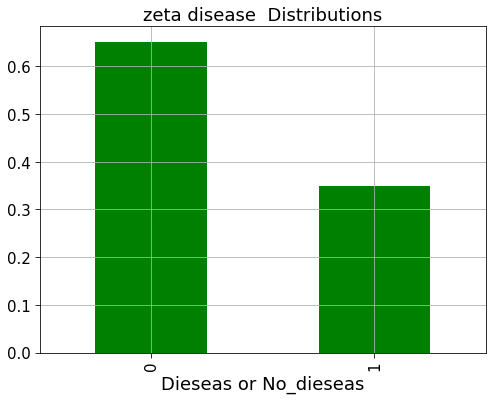

In [12]:
plt.figure(figsize=(8,6))
plt.title("zeta disease  Distributions",fontsize=18)
train["zeta_disease"].value_counts(normalize = True).plot.bar(color="green")
plt.tick_params(size=5,labelsize = 15)
plt.xticks(rotation = "vertical") # xticks are rotated as the visuallization was not clear
plt.xlabel("Dieseas or No_dieseas",fontsize=18)
plt.grid(0.3) 

 - __Target variable is imbalanced.__
 - __We have closed to 35% data having zeta disease and 65% not having any disease.__

In [13]:
#function to plot the distributons of individual feature
def plot_distribution(column_name,xlabel):
    plt.figure(figsize=(8,6))
    plt.title(f"{column_name} Distributions",fontsize=18)
    sns.distplot(train[column_name],color="green")
    
    #Calculate mean and median and draw vertical line 
    plt.axvline(train[column_name].mean(), color='r', linestyle='--')
    plt.axvline(train[column_name].median(), color='b', linestyle='-')
    
    plt.tick_params(size=5,labelsize = 15)
    plt.xticks(rotation = "vertical") # xticks are rotated as the visuallization was not clear
    plt.xlabel(f"{xlabel}",fontsize=18)
    plt.grid(0.3)

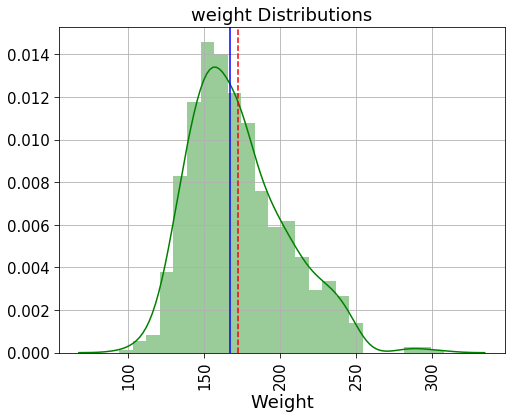

In [14]:
plot_distribution("weight","Weight")


- Weights varies between 100 to 250 pound.
- Distributon is slightly right skewed.

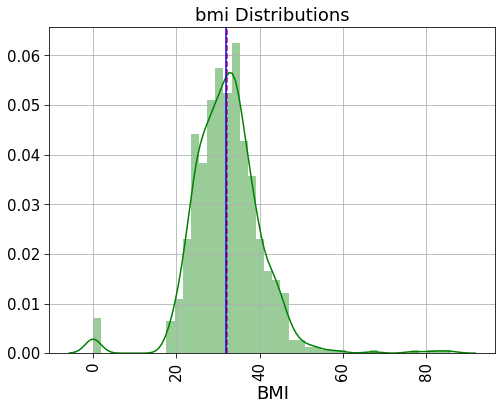

In [15]:
plot_distribution("bmi","BMI")


- BMI lies between 20 to 50 .
- distributons is skewed in both directions.

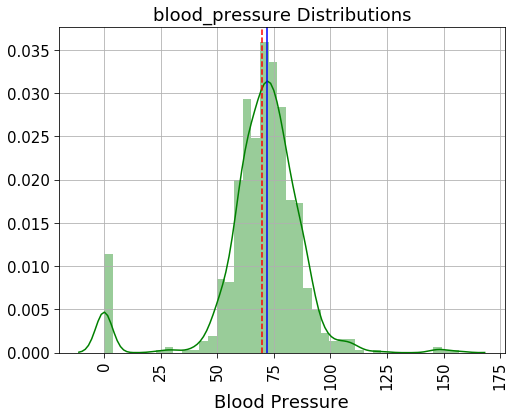

In [16]:
plot_distribution("blood_pressure","Blood Pressure")


### `Findings:`
- Blood Pressure Looks slightly bimodal.
- Many data points have blood pressure as 0.
- Measure data point lies between 60 to 90.

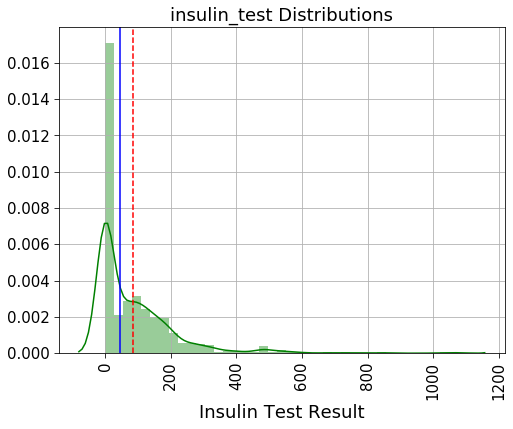

In [17]:
plot_distribution("insulin_test","Insulin Test Result")


### `Findings:`
- Insulin test results is highly right skewed.

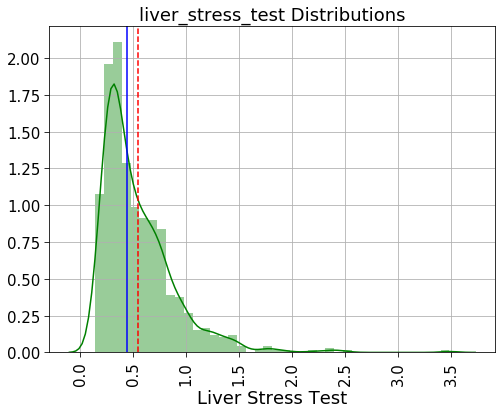

In [18]:
plot_distribution("liver_stress_test","Liver Stress Test")


### `Findings:`
- Liver Stress Test results is highly right skewed.

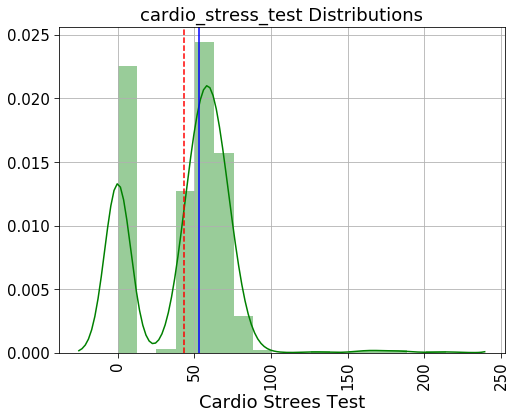

In [19]:
plot_distribution("cardio_stress_test","Cardio Strees Test")


- Cardio Strees Test almost bimodal distributions and right skewed

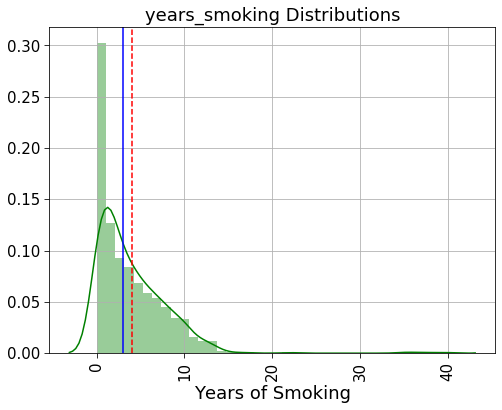

In [20]:
plot_distribution("years_smoking","Years of Smoking")


 - Years of Smoking data points are also right skewed

### `Univariate Segmented Analysis`
- We can perform a grouping on target variable and check the distributions of features.
- have taken aggregetd function as median instead of mean as we have lot of skewed data.
- Median is robust to outliers when less than 50% data are contaminated.

In [21]:
def plot_bar(column_name,ylabel):
    plt.figure(figsize=(8,6))
    plt.title(f"Zeta Disease vs {column_name}",fontsize=18)
    train.groupby("zeta_disease")[column_name].median().plot.bar(color="blue")
    plt.tick_params(size=5,labelsize = 15)
    plt.xticks(rotation = "vertical") # xticks are rotated as the visuallization was not clear
    plt.xlabel("Zeta Disease",fontsize=18)
    plt.ylabel(f"Median {ylabel}",fontsize=18)
    plt.grid(0.3)

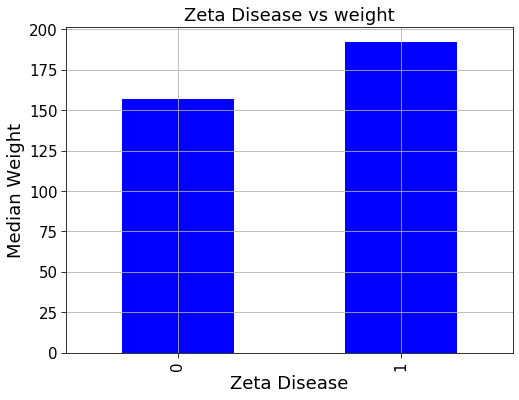

In [22]:
plot_bar("weight","Weight")


- Median weight lies close to 180 pound when person having desiese
- Persons having more weight can be prone to this disease.


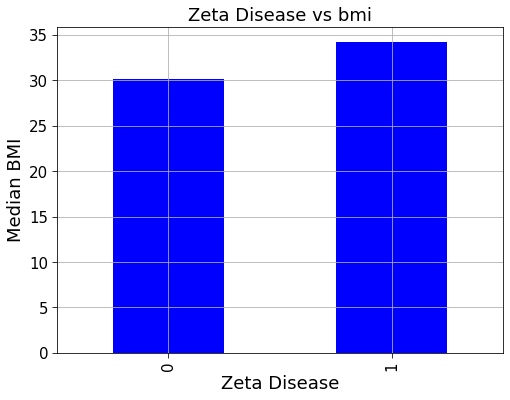

In [23]:
plot_bar("bmi","BMI")


 - Median BMI is more in Diseased persons .
 

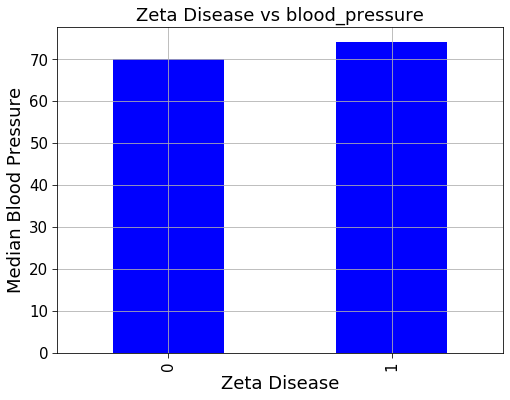

In [24]:
plot_bar("blood_pressure","Blood Pressure")

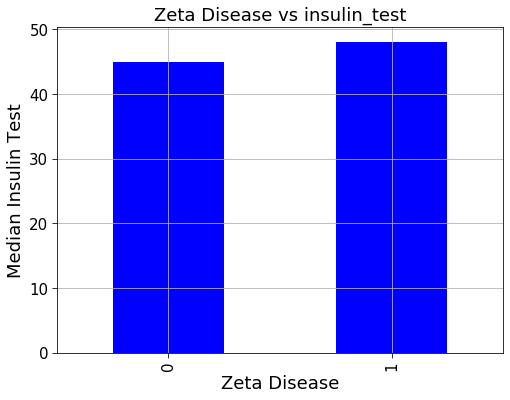

In [25]:
plot_bar("insulin_test","Insulin Test")

- From blood pressure graph there is no concluding evidences 
person having disease and not having disease.

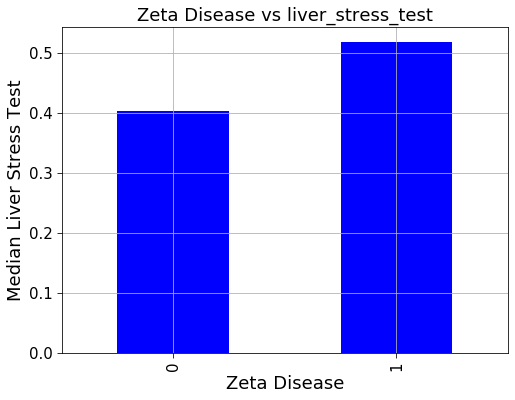

In [26]:
plot_bar("liver_stress_test","Liver Stress Test")


 - median liver stress test result for having disease is more than 0.5

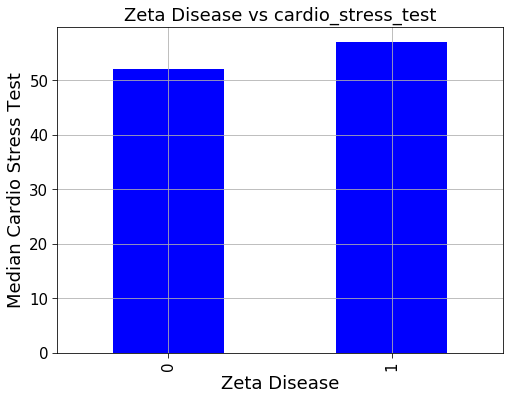

In [27]:
plot_bar("cardio_stress_test","Cardio Stress Test")


- Cardio stress does not give any conclusive evidense between disease and not having disease

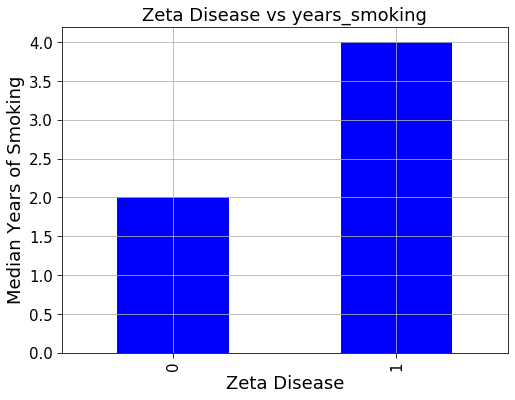

In [28]:
plot_bar("years_smoking","Years of Smoking")

- Person having disease have median years of smoking more.
- Median years of smoking having zeta is close to 4 .


In [29]:
def plot_box(column_name,ylabel):
    plt.figure(figsize=(8,6))
    plt.title(f"Zeta Disease  vs {ylabel}",fontsize=18)
    sns.boxplot(x="zeta_disease",y=column_name,data=train)
    plt.tick_params(size=5,labelsize = 15)
    plt.xticks(rotation = "vertical") # xticks are rotated as the visuallization was not clear
    plt.xlabel("Zeta Disease",fontsize=18)
    plt.ylabel(f"{ylabel}",fontsize=18)
    plt.grid(0.3)

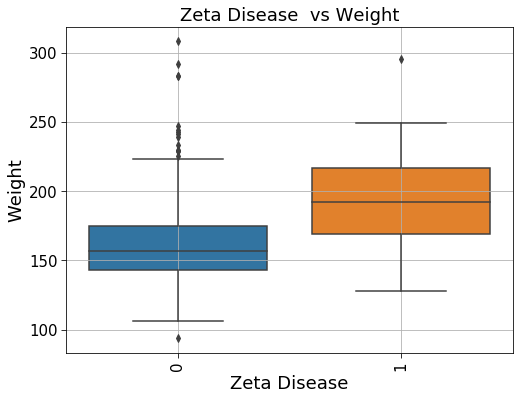

In [30]:
plot_box("weight","Weight")

- Median weight is more in having Zeta disease

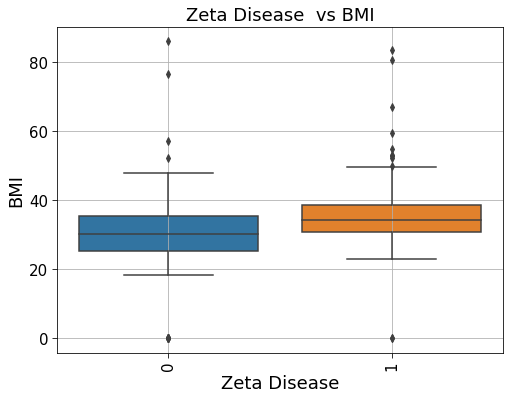

In [31]:
plot_box("bmi","BMI")


- BMI median is little high for zeta

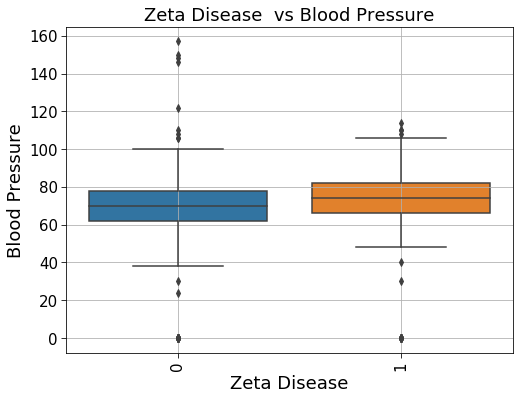

In [32]:
plot_box("blood_pressure","Blood Pressure")

- Blood pressure of both type are close.
- Hence no conclusing evidence 

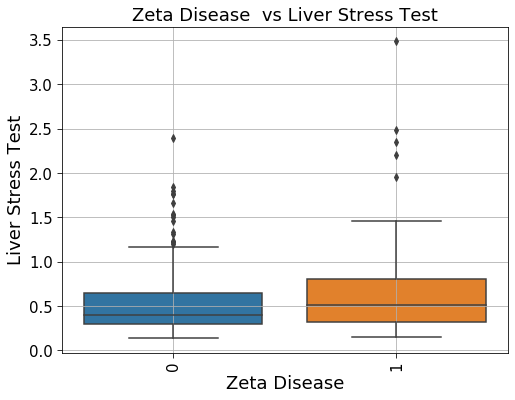

In [33]:
plot_box("liver_stress_test","Liver Stress Test")

- Liver Stress Test box plot has  no significance differences
- Median is almost equal.

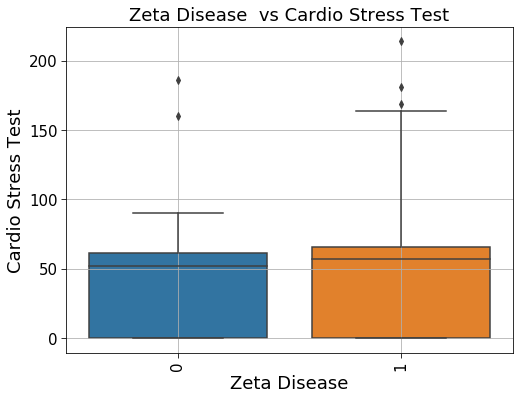

In [34]:
plot_box("cardio_stress_test","Cardio Stress Test")

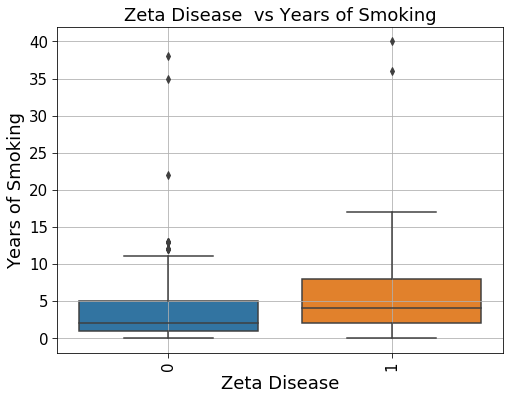

In [35]:
plot_box("years_smoking","Years of Smoking")


 - Median years of smoking is slightly more person having disease.

### `Segmented Analysis:`
 - All features are continuos variables
 - We can segment or divide it into categories and check how it is related to Target variable.
 

In [36]:
train['age_bins'] = pd.qcut(train['age'], q=4)

In [37]:
# Draw stacked plot 
def plot_stack(column_name,x_label):
    train.groupby(column_name)["zeta_disease"].value_counts(normalize=True).unstack().plot.bar(stacked=True,figsize=(8,6))
    plt.xlabel(f"{x_label}",fontsize=18)
    plt.ylabel("Percentage",fontsize=18)
    plt.tick_params(size=5,labelsize = 13)
    plt.legend(loc='best', bbox_to_anchor=(1,1))
    plt.grid(0.3)

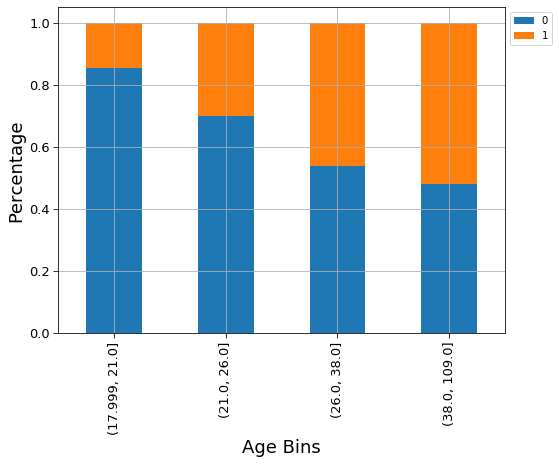

In [38]:
plot_stack("age_bins","Age Bins")

- Person having Age more than 26 are more prone to Zeta
- years range between 38-109, close 60% people are having disease

In [39]:
train['weight_bins'] = pd.qcut(train['weight'], q=4)

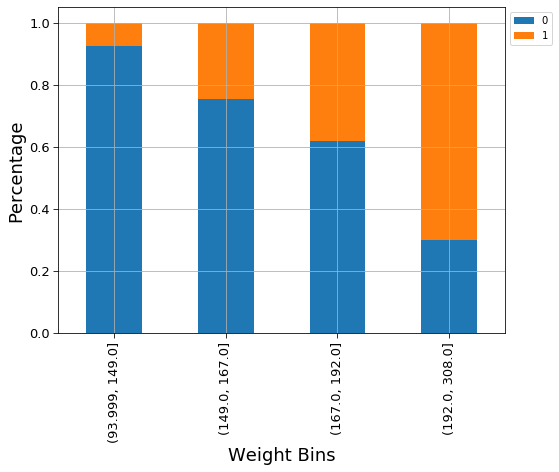

In [40]:
plot_stack("weight_bins","Weight Bins")

- Person having weight 192-308 lb are more prone to Zeta
- Close to 70% people in this category is having this disease

In [41]:
train['bmi_bins'] = pd.qcut(train['bmi'], q=4)

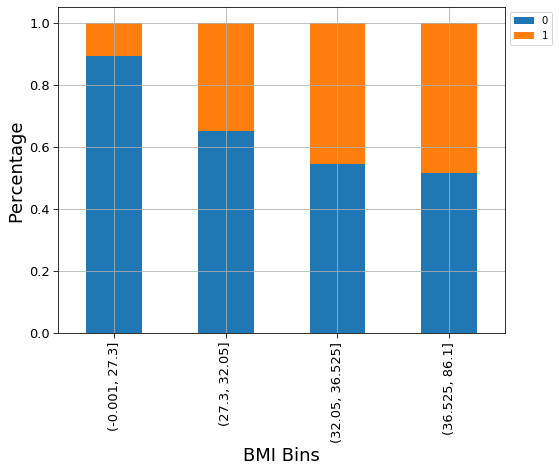

In [42]:
plot_stack("bmi_bins","BMI Bins")

- BMI more than 32 are more vulnerable to Zeta .
- Close to 50% people in this range are Prone to disease.

In [43]:
train['bp_bins'] = pd.qcut(train['blood_pressure'], q=4)

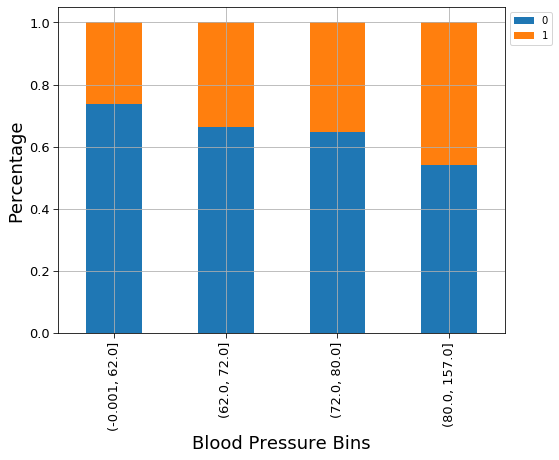

In [44]:
plot_stack("bp_bins","Blood Pressure Bins")

- persons having Higher Blood pressure are prone to this disease.


In [45]:
#cut you will see something more uneven: Qcut put even no of points inside each bean
#Anyway we are calculating Percentages.
train['insulin_test_bins'] = pd.cut(train['insulin_test'],4)

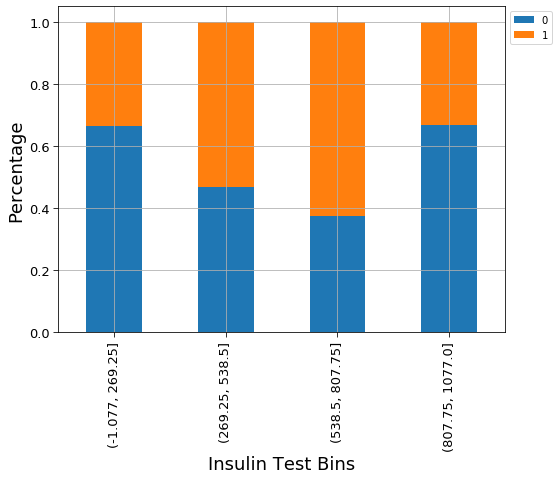

In [46]:
plot_stack("insulin_test_bins","Insulin Test Bins")

 - Data shows, insulin test range 538-807 have more percentages to zeta 


In [47]:
train['liver_stress_test_bins'] = pd.qcut(train['liver_stress_test'],q=4)

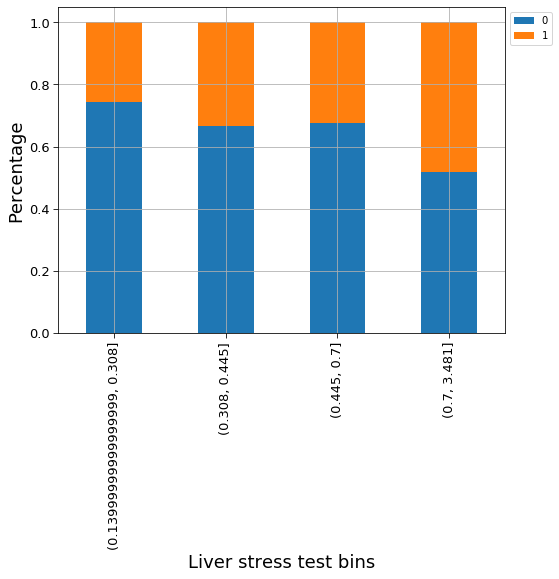

In [48]:
plot_stack("liver_stress_test_bins","Liver stress test bins")

- Liver stress test range between 0.7 to 3.4 are more prone to disease

In [49]:
train['cardio_stress_test_bins'] = pd.cut(train['cardio_stress_test'],4)

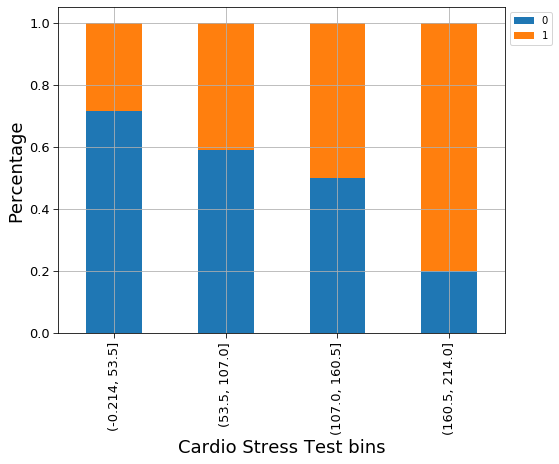

In [50]:
plot_stack("cardio_stress_test_bins","Cardio Stress Test bins")


- 80% people having Cardio Stress Test range between 160-215 are prone to Disease.

In [51]:
train['years_smoking_bins'] = pd.qcut(train['years_smoking'],q=4)

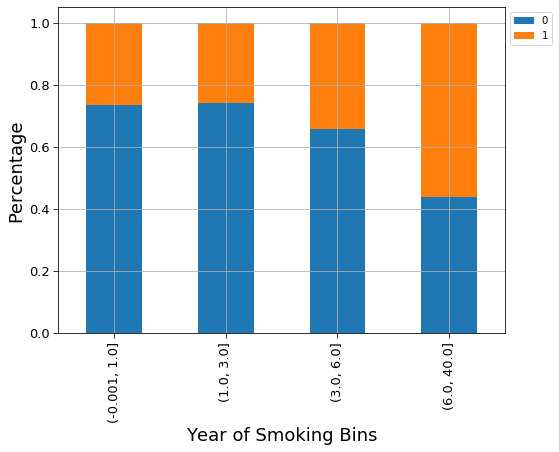

In [52]:
plot_stack("years_smoking_bins","Year of Smoking Bins")


- year of smoking 6-40 years range are more prone to disease

### `Correlation:`
- Most of the features are skewed and hence instead of pearson correlation we can check spearnman rank correlation

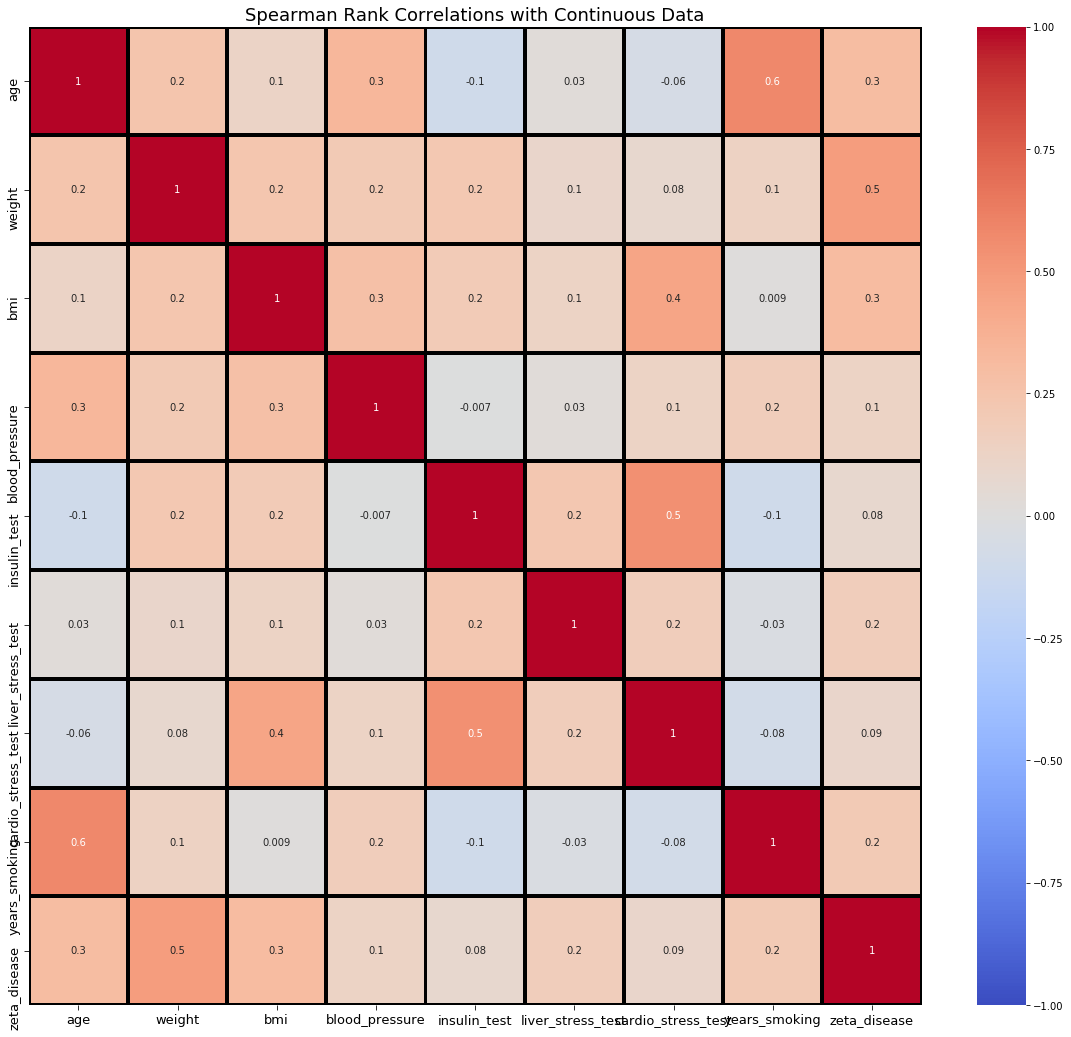

In [53]:
# columns = ["age","weight","bmi","blood_pressure","insulin_test","liver_stress_test","cardio_stress_test","years_smoking","zeta_disease"]
plt.figure(figsize=(20,18)) #figure size
plt.title("Spearman Rank Correlations with Continuous Data",fontsize=18)
sns.heatmap(train.corr(method="spearman"),annot=True,fmt='.1g',cmap= 'coolwarm',vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black')
plt.tick_params(size=5,labelsize = 13)

- maximum correlation value 0.6 and it is between Age and years of smoking 
- this is moderstely correlated , We do not have to ignore any of the feature.

### `Pairplot:`

<Figure size 1440x1440 with 0 Axes>

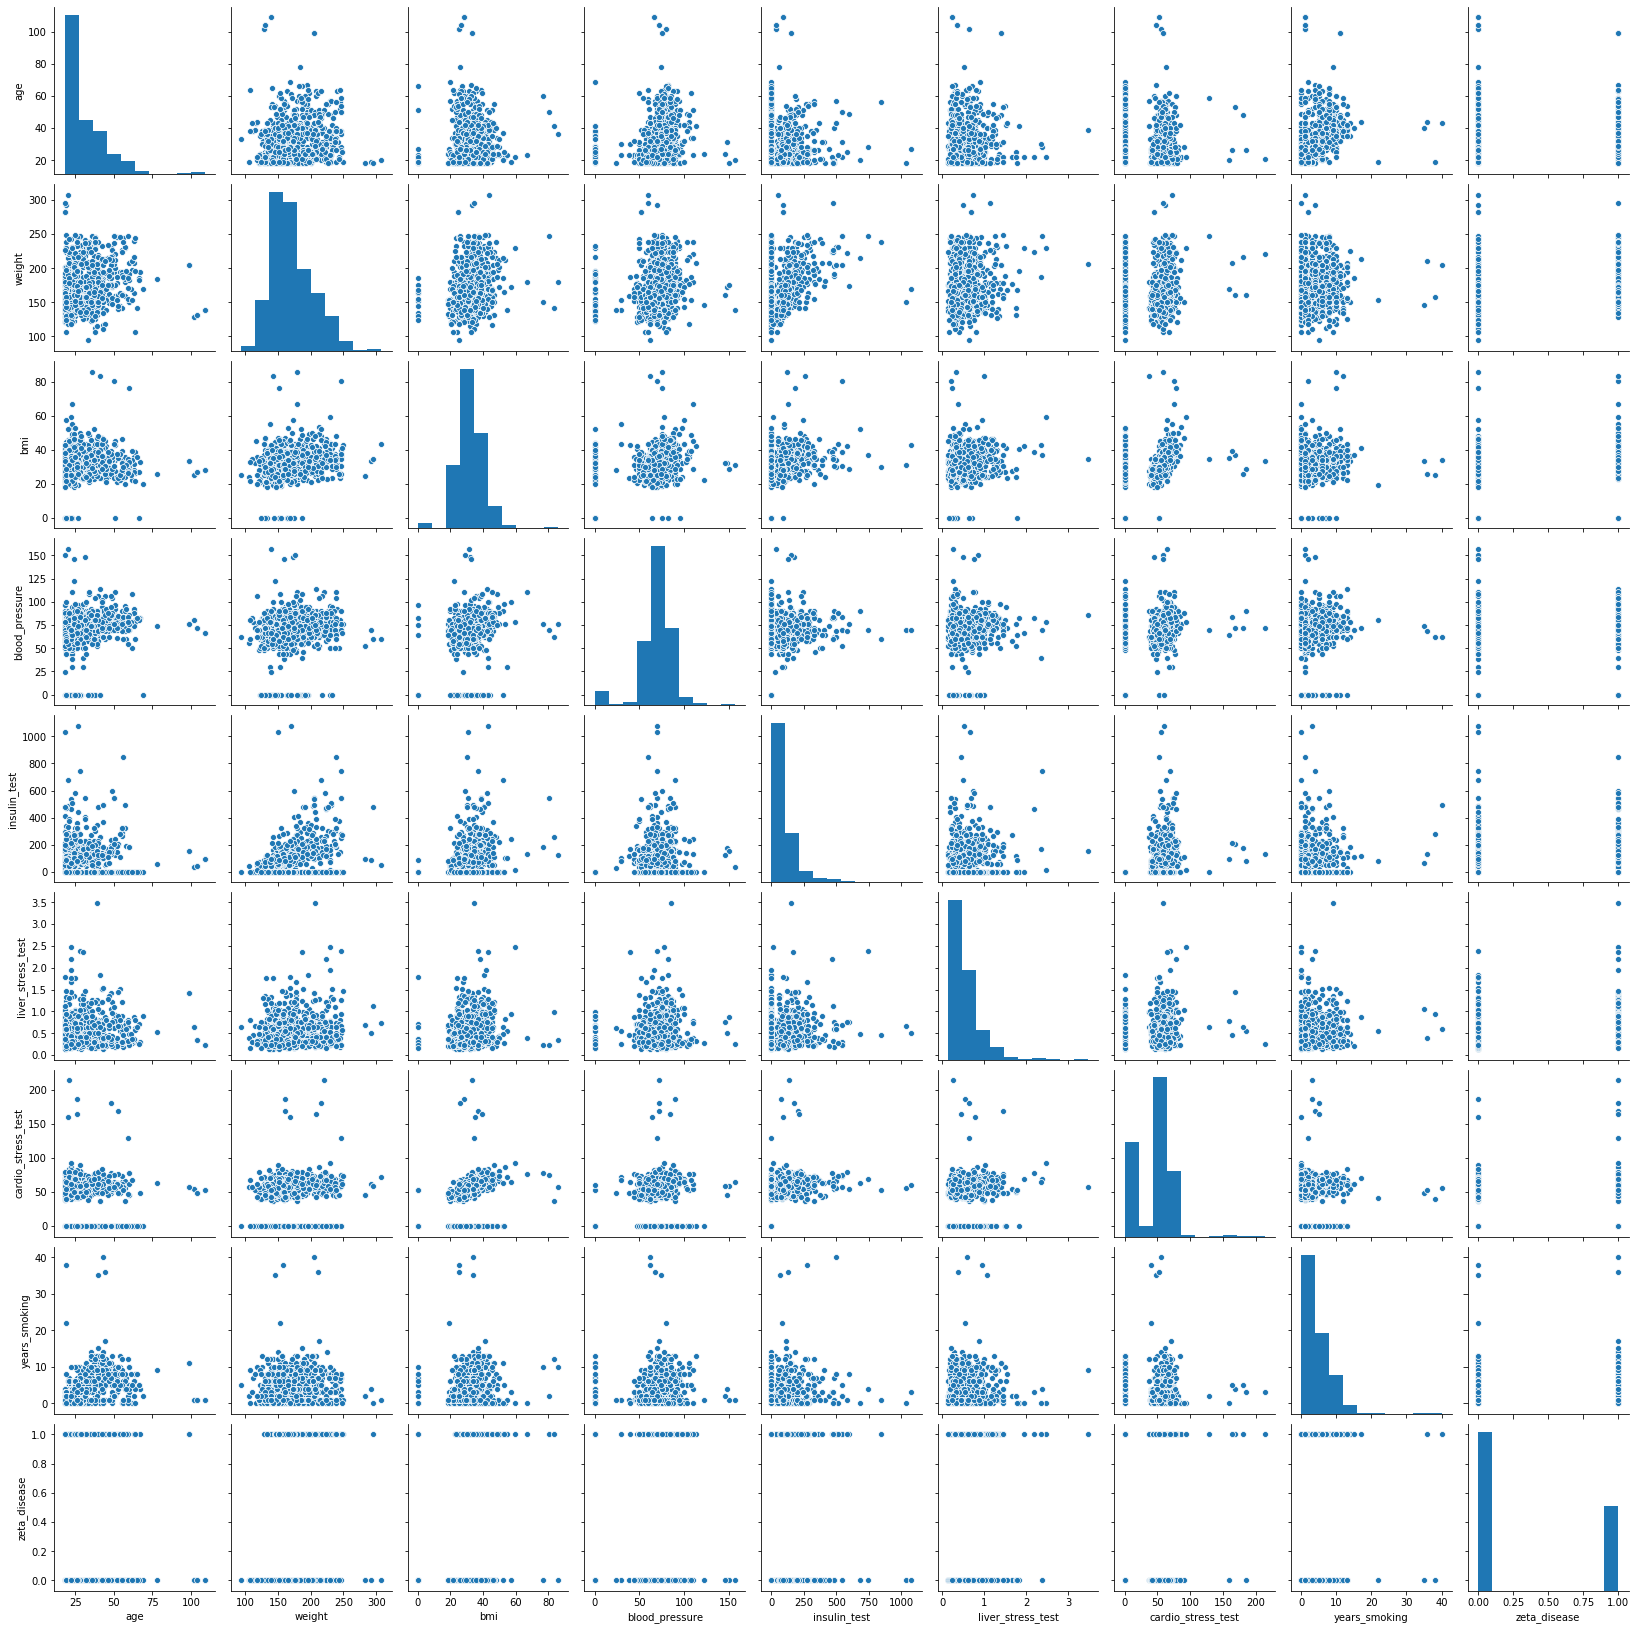

In [54]:
plt.figure(figsize=(20,20))
sns.pairplot(train)
plt.tick_params(size=5,labelsize = 13)
plt.show()

- Insulin test and Weight has some correlation but it is not very evident.
- Diagonal shows the individual feature distributions.


### `Drop the Bins(extra) columns which are created during data analysis:`

In [55]:
train.drop(columns=['age_bins', 'weight_bins', 'bmi_bins', 'bp_bins',
                     'insulin_test_bins', 'liver_stress_test_bins',
                       'cardio_stress_test_bins', 'years_smoking_bins'],inplace=True)

In [56]:
train.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

### `Training and validation data split:`
- Splitted the data 80:20 ratio.

In [57]:
train_data,val_data = train_test_split(train,test_size=0.2,random_state=48)

In [58]:
#check the shape of data
print(f"Training Data Shape:{train_data.shape}")
print(f"Validation Data Shape:{val_data.shape}")

Training Data Shape:(640, 9)
Validation Data Shape:(160, 9)


 - we have 640 training data and 160 test data

In [59]:
#check the Imbalance in training set
train_data["zeta_disease"].value_counts(normalize=True)

0    0.657813
1    0.342187
Name: zeta_disease, dtype: float64

In [60]:
# segregate  X_train and y_train 
y_train = train_data.pop("zeta_disease")
X_train = train_data

In [61]:
# Segregate X_test and y_test
y_val = val_data.pop("zeta_disease")
X_val = val_data

### `Perform Oversampling with SMOTE:`
- To address imbalance, we can create synthetic data around training set data


In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=48)
X_train_resample,y_train_resample = smote.fit_resample(X_train,y_train)

In [63]:
# Check the shape after Oversampling
print(f"Shape of train data after oversampling: {X_train_resample.shape}")
print(f"Value count of training target variable:\n{y_train_resample.value_counts()}")

Shape of train data after oversampling: (842, 8)
Value count of training target variable:
1    421
0    421
Name: zeta_disease, dtype: int64


### `Scaling:`
 - Most of the features are skewed
 - have applied minmax scaling instead of Standard scaling
 - Min max scaling gave better result in this scenario

In [64]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scale = MinMaxScaler()
temp_x_train = scale.fit_transform(X_train_resample)

#Form the dataframe after scaling
X_train_scale = pd.DataFrame(temp_x_train,columns=X_train.columns)
# Check the shape of scaled data
X_train_scale.shape

(842, 8)

In [65]:
X_train_scale.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,0.142857,0.590426,0.454002,0.471338,0.000000,0.135593,0.000000,0.263158
1,0.087912,0.164894,0.382318,0.496815,0.070566,0.083996,0.317204,0.026316
2,0.000000,0.425532,0.296296,0.433121,0.137419,0.017399,0.236559,0.000000
3,0.131868,0.095745,0.354839,0.407643,0.051068,0.085496,0.290323,0.052632
4,0.021978,0.234043,0.289128,0.369427,0.246054,0.158692,0.252688,0.052632


In [66]:
# Perform the scaling on test set
temp_x_val = scale.transform(X_val)
# form the test set dataframe after scaling
X_val_scale = pd.DataFrame(temp_x_val,columns=X_val.columns)

In [67]:
X_val_scale.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,0.230769,0.489362,0.350060,0.433121,0.117920,0.079196,0.317204,0.026316
1,0.000000,0.436170,0.264038,0.394904,0.194986,0.036598,0.252688,0.000000
2,0.263736,0.377660,0.413381,0.509554,0.000000,0.017699,0.000000,0.131579
3,0.175824,0.255319,0.367981,0.445860,0.063138,0.011099,0.333333,0.157895
4,0.230769,0.148936,0.372760,0.496815,0.000000,0.089096,0.000000,0.157895


## `Model Building:`

- started with simple model because it generilses well (Ocaam's razor)
- Model can be interpretd easily.

### `Logistic Regression with statsmodel:`
- Stats model gives statistical interpretation of model compare to scikit-learn.
- We can check the p-value and other parameters via stats model.
- p-value is less than 0.05 for feature/coefficient, the feature is significant
- Null Hypothesis states--> beta value is equal to 0( Not significant)
- If we reject the null hypothesis, Feature is significant.

In [68]:
import statsmodels.api as sm

#Stats model does not have bias variable,, hence manually added a bias with const column
X_train_sm = sm.add_constant(X_train_scale)
logm1 = sm.GLM(y_train_resample,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           zeta_disease   No. Observations:                  842
Model:                            GLM   Df Residuals:                      833
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -415.64
Date:                Mon, 12 Jul 2021   Deviance:                       831.27
Time:                        12:34:36   Pearson chi2:                     937.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.5199      0.555     -9.947      0.000      -6.608      -4.432
age                    2.4235      0.700      3.463      0.001       1.052       3.795
weight                 7.0904      0.660     10.738      0.000       5.796       8.385
bmi                    7.6967      1.171      6.574      0.000       5.402       9.991
blood_pressure        -1.9159      0.715     -2.680      0.007      -3.317      -0.515
insulin_test          -1.7103      0.849     -2.014      0.044      -3.375      -0.046
liver_stress_test      3.6906      1.003      3.680      0.000       1.725       5.656
cardio_stress_test    -0.8369      0.608     -1.377      0.168      -2.028       0.354
years_smoking          2.7213      0.920      2.957      0.003       0.918       4.525
======================================================================================
"""

In [69]:
feature_imp = pd.DataFrame(res.params,columns=["Coef"])
feature_imp= feature_imp.iloc[1:,:]

### `Plot the feature Importance:`

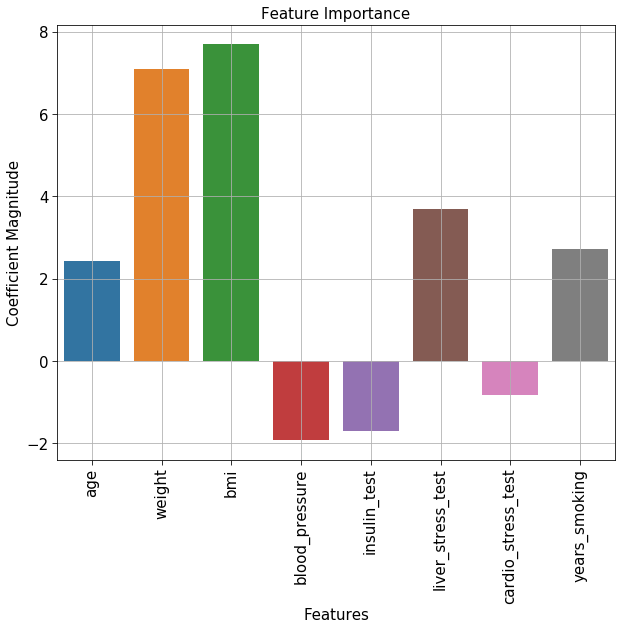

In [70]:
plt.figure(figsize=[10,8])
sns.barplot(x =feature_imp.index,y="Coef",data=feature_imp )
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### `Findings:`
- from above summary we can see p-value of cardio_stress_test is 0.16. 
- The coef is  0.83,compared to other feature, magnitude is low.
- Other variable are more significant to the final prediction.
- Weight and BMI are contributing more to the final model.

### `Check VIF:`
- to check the multicollinearity we can check the Variance Inflation Factor (1/ 1-R2)


In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scale.columns
vif['VIF'] = [variance_inflation_factor(X_train_scale.values, i) for i in range(X_train_scale.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,12.84
3,blood_pressure,10.74
1,weight,6.54
6,cardio_stress_test,4.13
0,age,2.77
5,liver_stress_test,2.51
7,years_smoking,2.43
4,insulin_test,1.99


- `For BMI,Blood Pressure,Weight the VIF is high,` 
- `These features Could have been deleted but from data analysis these 3 features are significantly contributing to the final model.`
- `Ideally VIF more than 5, are dropped for linear model like Logistic Regression and Linear regression.`

### `Analyse the FP,FN,Precision and Recall:`

In [73]:
# Getting the predicted probability values on the train data
y_train_pred_st = res.predict(X_train_sm)
y_train_pred_st[:10]

0    0.943773
1    0.104191
2    0.194533
3    0.079958
4    0.100377
5    0.656329
6    0.301507
7    0.228394
8    0.122709
9    0.061268
dtype: float64

In [74]:
y_train_pred_st = y_train_pred_st.values.reshape(-1)
y_train_pred_st[:10]

array([0.94377289, 0.10419131, 0.19453328, 0.07995758, 0.10037682,
       0.65632866, 0.30150742, 0.22839408, 0.12270931, 0.06126797])

### `Training Data Predict Probability vs Actual Prediction analysis:`

- take initial thresold of 0.5.
- probability >0.5 --> Postive class
- Probability <0.5  --> negative class

In [75]:
#create a DataFrame with Predict Probability and actual prediction in training Data
y_train_pred_final = pd.DataFrame({'zeta_disease':y_train_resample.values, 'Diseas_prob':y_train_pred_st})

In [76]:
y_train_pred_final

,zeta_disease,Diseas_prob
0,1,0.943773
1,0,0.104191
2,0,0.194533
3,0,0.079958
4,0,0.100377
...,...,...
837,1,0.545402
838,1,0.940590
839,1,0.851862
840,1,0.950414


In [77]:
# Assign 1 of prob>0.5 
y_train_pred_final['predicted'] = y_train_pred_final.Diseas_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,zeta_disease,Diseas_prob,predicted
0,1,0.943773,1
1,0,0.104191,0
2,0,0.194533,0
3,0,0.079958,0
4,0,0.100377,0


### `Plot confusion matrix:`
- Adjust the thresold and adjust the FP and FN 
- This should be based on business.
- In this scenrio I have try to reduce the FN and FP


In [78]:
# Plot confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.zeta_disease, y_train_pred_final.predicted )
print(confusion)

[[330  91]
 [109 312]]


In [79]:
# Check Precision
metrics.precision_score(y_train_pred_final.zeta_disease, y_train_pred_final.predicted )

0.7741935483870968

In [80]:
#Check Recall
metrics.recall_score(y_train_pred_final.zeta_disease, y_train_pred_final.predicted )

0.7410926365795725

### `Validation Data Predict Probability & Actual Prediction analysis:`

In [81]:
# Add BIAS or Const as stasmodel does not add it as a default
X_val_scale_sm = sm.add_constant(X_val_scale)
y_val_pred_st = res.predict(X_val_scale_sm)

In [82]:
y_val_pred_st[:10]

0    0.567180
1    0.173424
2    0.604874
3    0.227624
4    0.226366
5    0.374133
6    0.863852
7    0.214807
8    0.892640
9    0.473890
dtype: float64

In [83]:
y_val_pred_final = pd.DataFrame({'zeta_disease':y_val.values, 'Diseas_prob':y_val_pred_st})

In [84]:
y_val_pred_final['predicted'] = y_val_pred_final.Diseas_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_val_pred_final.head()

,zeta_disease,Diseas_prob,predicted
0,1,0.567180,1
1,0,0.173424,0
2,0,0.604874,1
3,0,0.227624,0
4,0,0.226366,0


In [85]:
confusion = metrics.confusion_matrix(y_val_pred_final.zeta_disease, y_val_pred_final.predicted )
print(confusion)

[[74 26]
 [16 44]]


In [86]:
metrics.precision_score(y_val_pred_final.zeta_disease, y_val_pred_final.predicted )

0.6285714285714286

In [87]:
metrics.recall_score(y_val_pred_final.zeta_disease, y_val_pred_final.predicted )

0.7333333333333333

### `Test Data Predict Probability:`

In [88]:
#get the columns names
X_train_resample.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking'],
      dtype='object')

In [89]:
# features for test data
X_test = test[X_train_resample.columns]

In [90]:
X_test.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,24,151,39.5,69,72,1.3968,56,4
1,27,179,35.5,89,156,1.6608,43,6
2,34,147,26.9,76,74,1.6958,53,2
3,35,206,32.4,73,127,1.4608,61,6
4,60,193,29.8,62,192,1.7798,65,9


In [91]:
# Perform the scaling on test set
temp_x_test = scale.transform(X_test)
# form the test set dataframe after scaling
X_test_scale = pd.DataFrame(temp_x_test,columns=X_val.columns)

In [92]:
#check test data after scaling
X_test_scale.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,0.065934,0.234043,0.471924,0.439490,0.066852,0.374681,0.301075,0.105263
1,0.098901,0.382979,0.424134,0.566879,0.144847,0.453877,0.231183,0.157895
2,0.175824,0.212766,0.321386,0.484076,0.068709,0.464377,0.284946,0.052632
3,0.186813,0.526596,0.387097,0.464968,0.117920,0.393880,0.327957,0.157895
4,0.461538,0.457447,0.356033,0.394904,0.178273,0.489576,0.349462,0.236842


In [93]:
# Add bias to test data
X_test_sm = sm.add_constant(X_test_scale)

In [94]:
#Predict the test data probability
y_test_pred_sm = res.predict(X_test_sm)
y_test_pred_sm[:10]

0    0.596888
1    0.781964
2    0.368662
3    0.896814
4    0.935821
5    0.386530
6    0.470725
7    0.328350
8    0.851296
9    0.691040
dtype: float64

In [95]:
# Create DataFrame 
y_test_pred_final = pd.DataFrame({'Diseas_prob':y_test_pred_sm})

In [96]:
y_test_pred_final['predicted'] = y_test_pred_final.Diseas_prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Diseas_prob,predicted
0,0.596888,1
1,0.781964,1
2,0.368662,0
3,0.896814,1
4,0.935821,1


### `Predicted Test Data for Logistic Regression:`

In [97]:
#Build Final DataFrame with test data with Predict probability and Predicted value.
predicted_test_result = pd.concat([X_test,y_test_pred_final],axis=1)
predicted_test_result

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,Diseas_prob,predicted
0,24,151,39.5,69,72,1.3968,56,4,0.596888,1
1,27,179,35.5,89,156,1.6608,43,6,0.781964,1
2,34,147,26.9,76,74,1.6958,53,2,0.368662,0
3,35,206,32.4,73,127,1.4608,61,6,0.896814,1
4,60,193,29.8,62,192,1.7798,65,9,0.935821,1
5,45,120,36.5,108,50,1.2978,54,12,0.386530,0
6,20,139,38.2,61,77,1.5818,68,3,0.470725,0
7,23,137,31.2,70,73,1.4168,59,7,0.328350,0
8,36,195,30.5,59,141,1.4498,59,6,0.851296,1
9,19,193,25.8,84,66,1.7938,50,3,0.691040,1


### `Function to check the performance of Model:`

In [98]:
# Check the performance on test set
#Precision
#recall
#f1_score
#ROC_AUC
def calculate_peformance_testdata(model_name,y_test,y_pred,pred_prob):
        
    '''y_test:Test Labels,
       y_pred: Prediction Labels ,
       pred_prob:Predicted Probability  '''
    
    print(f"{model_name}:")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"f1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"roc_auc: {roc_auc}")
#     return a DataFrame with all the score
    return pd.DataFrame({"Model":[model_name],"precision":[precision],"recall":[recall],"f1_score":[f1_score],
                         "roc_auc":[roc_auc]}) 

In [99]:
# Create a DataFrame which stores all validation score for each model
score_df = pd.DataFrame({"Model":[None],"precision":[None],"recall":[None],"f1_score":[None],"roc_auc":[None]})

### `Logistic Regression with sklearn:`

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Instantiate logistic regression
lr_obj = LogisticRegression(random_state=40)
lr_obj.fit(X_train_scale, y_train_resample)
cv_score = cross_val_score(lr_obj, X_train_scale, y_train_resample, cv=5, scoring='f1_micro')
print(f"Cross validation score: {cv_score}")

Cross validation score: [0.73372781 0.73964497 0.76190476 0.74404762 0.73214286]


In [101]:
#Prediction on   validation data
y_pred_lr = lr_obj.predict(X_val_scale)
#check predict probability on validation data
pred_prob = lr_obj.predict_proba(X_val_scale)

In [102]:
# Predict probability gives probability of 0 and 1
# We are more concern about Prbablity of 1,Hence selected pred_prob[:,1]
pred_prob[:10]

array([[0.40808193, 0.59191807],
       [0.67745379, 0.32254621],
       [0.4249999 , 0.5750001 ],
       [0.69012509, 0.30987491],
       [0.71371606, 0.28628394],
       [0.6016493 , 0.3983507 ],
       [0.23587088, 0.76412912],
       [0.68535552, 0.31464448],
       [0.13457281, 0.86542719],
       [0.48566629, 0.51433371]])

### `Check Model performance on validation data:`

In [103]:
df1 = calculate_peformance_testdata("LogisticRegression",y_val,y_pred_lr,pred_prob[:,1])

LogisticRegression:
precision: 0.6231884057971014
recall: 0.7166666666666667
f1_score: 0.6666666666666667
roc_auc: 0.8136666666666665


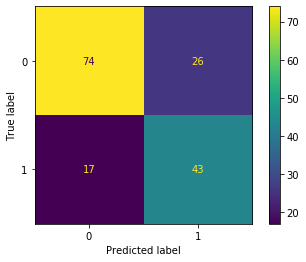

In [104]:
metrics.plot_confusion_matrix(lr_obj, X_val_scale, y_val)
plt.show()

- Without any hyparameter tunning we get 67% of F1 score.
- we have 16 False Negative and 26 False Postive out of 160 .
- Precision is 62% and recall is 72% .
- We need to reduce both FP and FN in this scenario.
- Reducing FN in Zeta diseas prediction takes precidence 
- Think interms of Covid:  - FN covid patient is way more hazardous than a FP covid person 


### Hyperparameter tunning in Logistic Regression :


In [105]:
param = {"penalty":["l1","l2","elasticnet"],
          "C" :[1,2,4,6,8],"solver":["liblinear","newton-cg","lbfgs"],
          "max_iter":[100,120,140,200]}

lr_hyp = LogisticRegression(random_state=41)
rscv_lr = RandomizedSearchCV(lr_hyp, param, random_state=41,scoring="f1_micro")
search = rscv_lr.fit(X_train_scale,y_train_resample)

In [106]:
search.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 120, 'C': 8}

In [107]:
search.best_score_

0.7577486615948155

- For Hyparameter tunning we are using Random approach.
- Best paramter  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 120, 'C': 8}
- usually this should be performed in more automated environment through a Framework like katib or optuna.


### Build Logistic Regression model with the best Parameters:

In [108]:
lr_obj = LogisticRegression(penalty="l2",C = 6,solver = "newton-cg",random_state=41)
lr_obj.fit(X_train_scale, y_train_resample)
cv_score = cross_val_score(lr_obj, X_train_scale, y_train_resample, cv=5, scoring='f1_micro')
print(f"Cross validation score: {cv_score}")

Cross validation score: [0.75147929 0.73964497 0.76785714 0.7797619  0.73809524]


In [109]:
#Prediction on   validation data
y_pred_lr = lr_obj.predict(X_val_scale)
#check predict probability on validation data
pred_prob = lr_obj.predict_proba(X_val_scale)

In [110]:
df1 = calculate_peformance_testdata("LogisticRegression",y_val,y_pred_lr,pred_prob[:,1])

LogisticRegression:
precision: 0.6231884057971014
recall: 0.7166666666666667
f1_score: 0.6666666666666667
roc_auc: 0.8211666666666666


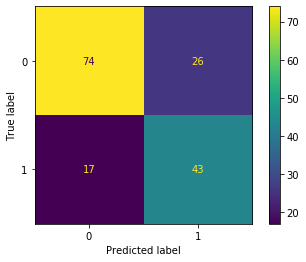

In [111]:
metrics.plot_confusion_matrix(lr_obj, X_val_scale, y_val)
plt.show()

In [112]:
score_df = score_df.append(df1)

In [113]:
score_df

,Model,precision,recall,f1_score,roc_auc
0,None,NaN,NaN,NaN,NaN
0,LogisticRegression,0.623188,0.716667,0.666667,0.821167


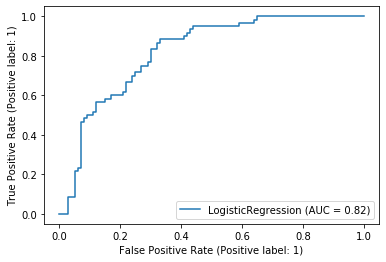

In [114]:
#Plot ROC_AUC Curve for Logistic Regression
metrics.plot_roc_curve(lr_obj, X_val_scale, y_val)
plt.show()

In [115]:
print(metrics.classification_report(y_val,y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       100
           1       0.62      0.72      0.67        60

    accuracy                           0.73       160
   macro avg       0.72      0.73      0.72       160
weighted avg       0.74      0.73      0.73       160



### `Findings:`
- The precision in label 1,is not very well and comes around 62%.

### Fearure Importance and Model Interpretation

In [116]:
#Create a Feature importance dataframe
Feature_importance = pd.DataFrame({"columns":X_train_scale.columns,"feature_importance":lr_obj.coef_.ravel()})

In [117]:
Feature_importance

,columns,feature_importance
0,age,2.263476
1,weight,6.595688
2,bmi,6.275253
3,blood_pressure,-1.563876
4,insulin_test,-1.294331
5,liver_stress_test,3.111405
6,cardio_stress_test,-0.751698
7,years_smoking,2.405736


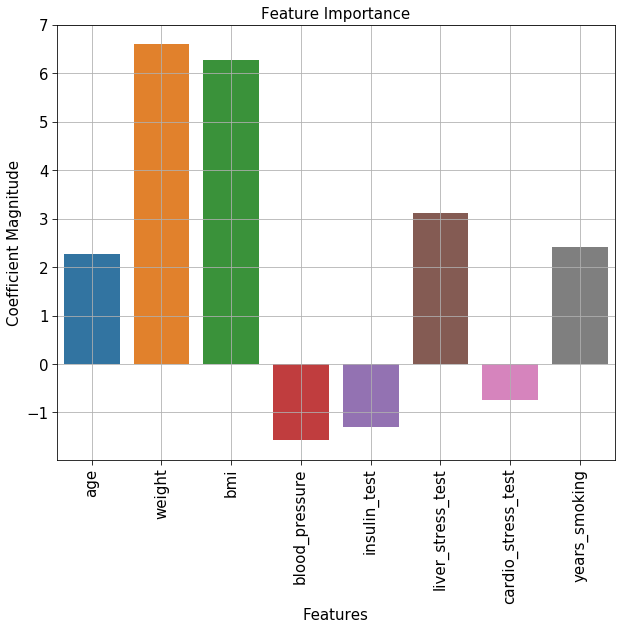

In [118]:
#Plot to show the feature importance
plt.figure(figsize=[10,8])
sns.barplot(x = "columns",y="feature_importance",data=Feature_importance)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### `Findings`:
- Most significant features are weight and BMI
- Weight and BMI are positively correlated with Target variable.

### `Model Calibration:`

- For balanced dataset Calibration may not be so fruitful.
- But we can check if any improvement can be done.

In [119]:
from  sklearn.calibration import calibration_curve
prob_true,prob_pred = calibration_curve(y_val,pred_prob[:,1],n_bins=10,)
print(prob_true)
print(prob_pred)

[0.         0.         0.13043478 0.19047619 0.52631579 0.46666667
 0.25       0.70588235 0.85714286 0.66666667]
[0.07243722 0.1628764  0.23926643 0.36118342 0.46756493 0.5532686
 0.62519542 0.74714445 0.84544253 0.95453443]


In [120]:
print("Barrier",metrics.brier_score_loss(y_val, pred_prob[:,1], pos_label=2))

Barrier 0.310191837277054


### `Calibration Plot:`

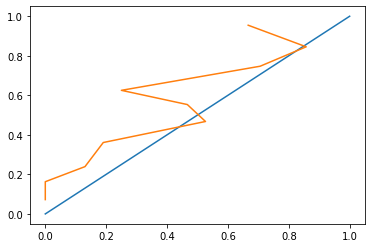

In [121]:
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()

- The model is ill caliberated or less reliable.
- Actual and predicted probability differs alot .

### `Calibrate our model`
- We will apply Platt scaling (calibrate using sigmoid distribution).
- Sklearn offers a predefined function that does the job: CalibratedClassifierCV.

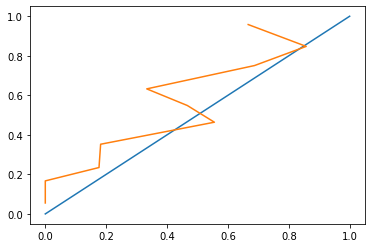

In [122]:
from sklearn.calibration import CalibratedClassifierCV 
calib_model = CalibratedClassifierCV(lr_obj, method='sigmoid', cv=5,) 
calib_model.fit(X_train_scale, y_train_resample) 
prob = calib_model.predict_proba(X_val_scale)[:, 1]

#plot the calibration curve (see above to know what is it)
prob_true,prob_pred = calibration_curve(y_val, prob, n_bins=10, normalize='True') 
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()

In [123]:
y_pred_lr = calib_model.predict_proba(X_val_scale)
metrics.brier_score_loss(y_val, y_pred_lr[:,1], pos_label=2)

0.31139586494977256

In [124]:
print("roc",metrics.roc_auc_score(y_val, y_pred_lr[:,1]))

roc 0.8211666666666667


### `Findings:`

- We did not see any imporvement in the model calibration with Logistic regression as data is balanced and logistic model work well on predict probablity.
- it’s not obvious that improved calibrated probabilities will contribute 
   to better predictions based on class or probability. 
- In my view SVM, decision trees, and random forest are more likely to be improved after calibration
- Doing experiment in this scenario does not make harm


### `Decision Tree:`

In [125]:
# Intially build with default paramters 
from sklearn.tree import DecisionTreeClassifier
#Instantiate Decision tree with defautl parameter
dt_obj=  DecisionTreeClassifier(random_state=40)

# here we have used data generated by SMOTE. 
dt_obj.fit(X_train_scale, y_train_resample)
cv_score = cross_val_score(dt_obj, X_train_scale, y_train_resample, cv=5, scoring='f1_micro')
print(cv_score)

[0.75739645 0.71005917 0.73214286 0.80952381 0.73214286]


In [126]:
dt_obj.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

### `Hyperparameter Tunning on Decision Tree:`

- f1_micro:Calculate metrics globally by counting the total true positives, false negatives and false positives.
- does take label imbalance into account.

In [127]:
#Perform hyperparamter tuning with randomizedsearchcv
param_grid = dict({"criterion":["gini","entropy"],"max_leaf_nodes":[1,2,4,5,6],"min_samples_leaf":[1,2,3,4,5],'min_samples_split':[1,2,3,4,5]})
dt_clf = DecisionTreeClassifier(random_state=40)
dt_clf_rcv = RandomizedSearchCV(dt_clf,param_grid,cv=5,scoring="f1_micro")# n_jobs=-1
dt_clf_rcv.fit(X_train_scale, y_train_resample)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_leaf_nodes': [1, 2, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5]},
                   scoring='f1_micro')

In [128]:
print(dt_clf_rcv.best_score_)
print(dt_clf_rcv.best_estimator_)

0.745865032403494
DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=3, random_state=40)


In [129]:
#Train the decision tree with best paramters obtained from above step
dt_clf = DecisionTreeClassifier(max_leaf_nodes=6,min_samples_leaf=2,min_samples_split=5,random_state=40)
dt_clf.fit(X_train_scale,y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=2,
                       min_samples_split=5, random_state=40)

In [130]:
#perform the prediction 
y_pred_dt = dt_clf.predict(X_val_scale)
#Perform the prediction probability
pred_prob = dt_clf.predict_proba(X_val_scale)

In [131]:
df2 = calculate_peformance_testdata("DecisionTree",y_val,y_pred_dt,pred_prob[:,1])

DecisionTree:
precision: 0.6438356164383562
recall: 0.7833333333333333
f1_score: 0.7067669172932332
roc_auc: 0.8140000000000001


In [132]:
#Add the score to Dataframe  for comparision 
score_df = score_df.append(df2)
score_df.dropna(inplace=True)
score_df.drop_duplicates(inplace=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.623188,0.716667,0.666667,0.821167
0,DecisionTree,0.643836,0.783333,0.706767,0.814000


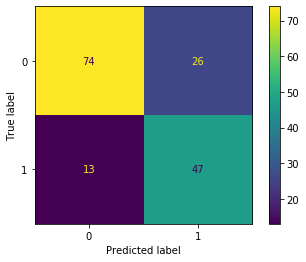

In [133]:
#visualize the confusion matrix
metrics.plot_confusion_matrix(dt_clf, X_val_scale, y_val)
plt.show()

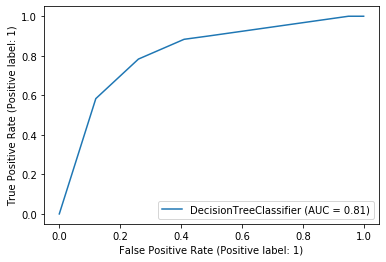

In [134]:
metrics.plot_roc_curve(dt_clf, X_val_scale, y_val)
plt.show()

In [135]:
print(metrics.classification_report(y_val,y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       100
           1       0.64      0.78      0.71        60

    accuracy                           0.76       160
   macro avg       0.75      0.76      0.75       160
weighted avg       0.77      0.76      0.76       160



In [136]:
Feature_importance_dt = pd.DataFrame({"columns":X_train_scale.columns,"feature_importance":dt_clf.feature_importances_})

In [137]:
Feature_importance_dt

,columns,feature_importance
0,age,0.176614
1,weight,0.602367
2,bmi,0.221019
3,blood_pressure,0.000000
4,insulin_test,0.000000
5,liver_stress_test,0.000000
6,cardio_stress_test,0.000000
7,years_smoking,0.000000


### `Faeture Importance DT:`

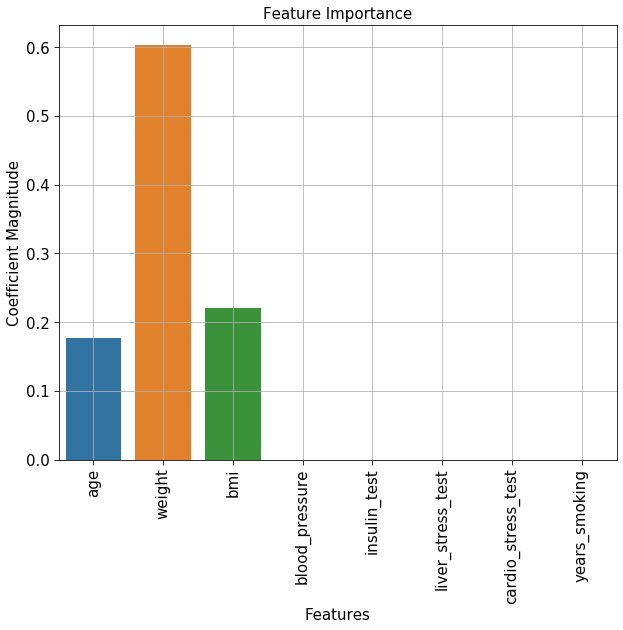

In [138]:
#Plot to show the feature importance
plt.figure(figsize=[10,8])
sns.barplot(x = "columns",y="feature_importance",data=Feature_importance_dt)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### `Findings:`
- Weight,BMI and Age are measure contributor to the final model

### `Calibration:`

In [139]:
prob_true,prob_pred = calibration_curve(y_val,pred_prob[:,1],n_bins=10,)
print(prob_true)
print(prob_pred)

[0.         0.1147541  0.28571429 0.46153846 0.74468085]
[0.07692308 0.15668558 0.42647059 0.64705882 0.82746479]


In [140]:
print("Barrier",metrics.brier_score_loss(y_val, pred_prob[:,1], pos_label=2))


Barrier 0.3025844591644308


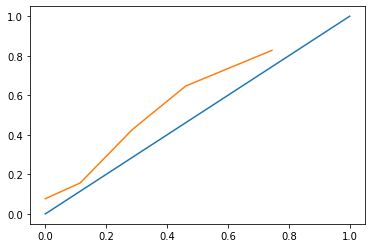

In [141]:
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()

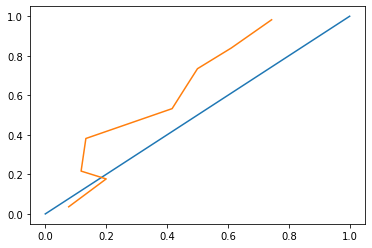

In [142]:
# from sklearn.calibration import CalibratedClassifierCV 
calib_model = CalibratedClassifierCV(dt_clf, method='sigmoid', cv=5) 
calib_model.fit(X_train_scale, y_train_resample) 
prob = calib_model.predict_proba(X_val_scale)[:, 1]

#plot the calibration curve (see above to know what is it)
prob_true,prob_pred = calibration_curve(y_val, prob, n_bins=10, normalize='True') 
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()

In [143]:
y_pred_dt = calib_model.predict_proba(X_val_scale)
metrics.brier_score_loss(y_val, y_pred_dt[:,1], pos_label=2)

0.278342877461249

In [144]:
metrics.roc_auc_score(y_val,y_pred_dt[:,1])

0.8316666666666667

### `Findings:`
- To improve calibration we need to do more experiments on data
- I just stopped it here.

### `Randomforest:`

In [145]:
#Instantiate RandomForest, train with default parameters
rf_class = RandomForestClassifier(n_jobs=-1,oob_score=True) 
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_val_scale)
pred_prob = rf_class.predict_proba(X_val_scale)

In [146]:
rf_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [147]:
rf_class.oob_score_

0.836104513064133

In [148]:
df3 = calculate_peformance_testdata("RandomForest",y_val,y_pred_rf,pred_prob[:,1])

RandomForest:
precision: 0.734375
recall: 0.7833333333333333
f1_score: 0.7580645161290323
roc_auc: 0.8486666666666667


### `Hyperparameter Tunning for Random Forest:`

In [149]:
#perform hyperparameter tuning
param_grid = dict({"n_estimators":[90,100,110,120],"min_samples_split":[1,2,3],"min_samples_leaf":[1,2,3]})
rf_class = RandomForestClassifier(random_state=40,n_jobs=-1)
rf_clf_rcv = RandomizedSearchCV(rf_class,param_grid,cv=5,scoring="f1_micro")
rf_clf_rcv.fit(X_train_scale,y_train_resample)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=40),
                   param_distributions={'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [90, 100, 110, 120]},
                   scoring='f1_micro')

In [150]:
#check the best parameters and score in cross validation 
print(rf_clf_rcv.best_score_)
print(rf_clf_rcv.best_estimator_)

0.817194984502677
RandomForestClassifier(min_samples_split=3, n_estimators=120, n_jobs=-1,
                       random_state=40)


In [151]:
rf_class = RandomForestClassifier(min_samples_leaf=3,n_estimators=110,n_jobs=-1,random_state=40)
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_val_scale)
pred_prob = rf_class.predict_proba(X_val_scale)

In [152]:
df4 = calculate_peformance_testdata("RandomForest",y_val,y_pred_rf,pred_prob[:,1])

RandomForest:
precision: 0.7101449275362319
recall: 0.8166666666666667
f1_score: 0.7596899224806202
roc_auc: 0.8483333333333334


In [153]:
score_df = score_df.append(df4)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.623188,0.716667,0.666667,0.821167
0,DecisionTree,0.643836,0.783333,0.706767,0.814000
0,RandomForest,0.710145,0.816667,0.759690,0.848333


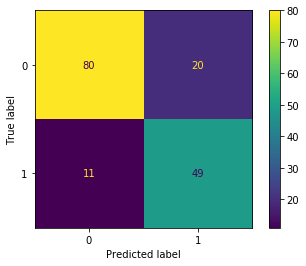

In [154]:
#visualize confusion matrix
metrics.plot_confusion_matrix(rf_class, X_val_scale, y_val)
plt.show()

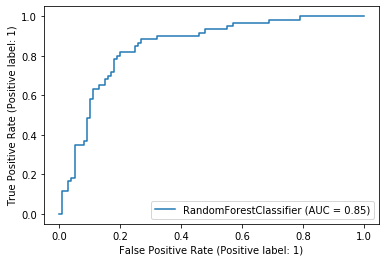

In [155]:
#plot roc auc cureve
metrics.plot_roc_curve(rf_class, X_val_scale, y_val)
plt.show()

In [156]:
print(metrics.classification_report(y_val,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       100
           1       0.71      0.82      0.76        60

    accuracy                           0.81       160
   macro avg       0.79      0.81      0.80       160
weighted avg       0.82      0.81      0.81       160



In [157]:
Feature_importance_rf = pd.DataFrame({"columns":X_train_scale.columns,"feature_importance":rf_class.feature_importances_})

In [158]:
Feature_importance_rf

,columns,feature_importance
0,age,0.165267
1,weight,0.273522
2,bmi,0.184852
3,blood_pressure,0.071971
4,insulin_test,0.069483
5,liver_stress_test,0.106791
6,cardio_stress_test,0.062945
7,years_smoking,0.065170


### `Feature Importance for RF:`

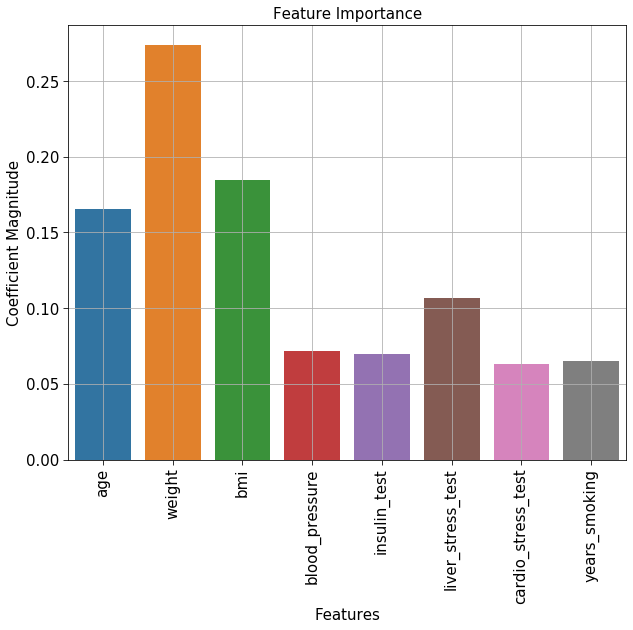

In [159]:
#Plot to show the feature importance
plt.figure(figsize=[10,8])
sns.barplot(x = "columns",y="feature_importance",data=Feature_importance_rf)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### `Calibration for Random Forest:`

In [160]:
val_pred_prob = rf_class.predict_proba(X_val_scale)
y_pred_val_rf = rf_class.predict(X_val_scale)

In [161]:
prob_true,prob_pred = calibration_curve(y_val,val_pred_prob[:,1],n_bins=10,)
print(prob_true)
print(prob_pred)

[0.04       0.08695652 0.15789474 0.1        0.28571429 0.625
 0.6875     0.78947368 0.69230769 0.8       ]
[0.05131609 0.1414693  0.24097691 0.34775512 0.44176864 0.54866351
 0.65397236 0.74337225 0.85079217 0.92592733]


In [162]:
print("Barrier",metrics.brier_score_loss(y_val, val_pred_prob[:,1], pos_label=2))

Barrier 0.25957013167468856


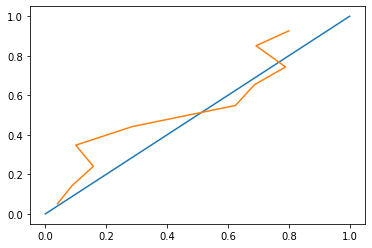

In [163]:
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()

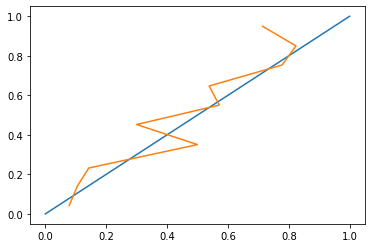

In [164]:
from sklearn.calibration import CalibratedClassifierCV 
calib_model = CalibratedClassifierCV(rf_class, method='sigmoid', cv=5,) 
calib_model.fit(X_train_scale, y_train_resample) 
prob = calib_model.predict_proba(X_val_scale)[:, 1]

#plot the calibration curve (see above to know what is it)
prob_true,prob_pred = calibration_curve(y_val, prob, n_bins=10, normalize='True') 
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()


In [165]:
y_pred_rf = calib_model.predict_proba(X_val_scale)
metrics.brier_score_loss(y_val, y_pred_rf[:,1], pos_label=2)

0.2729852570031416

### `Findings:`
- For random forest the clibration has improved.
- Barier loss has improved from 43% to 41%
- Final Model can be build from this calibration Model

### GradientBoosting

In [166]:
#Train gradient boosting with default parameters
from sklearn.ensemble import GradientBoostingClassifier
gb_class = GradientBoostingClassifier(random_state=42)
gb_class.fit(X_train_scale,y_train_resample)

#get the predicated label
y_pred_gb = gb_class.predict(X_val_scale)
#get the predicted probability
pred_prob = gb_class.predict_proba(X_val_scale)

In [167]:
# n_estimators=110,min_samples_leaf=2,min_samples_split=3,learning_rate=0.2

gb_class.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [168]:
#Hyperparameter tuning 

param_grid = dict({"n_estimators":[90,100,110],
                   "min_samples_split":[1,2,3,4],
                   "min_samples_leaf":[1,2,3],
                   "max_depth":[2,3,4],
                   "learning_rate":[0.1,.2,.3]})

gb_class_cv = GradientBoostingClassifier(random_state=40)
gb_clf_rcv = RandomizedSearchCV(gb_class_cv,param_grid,cv=5,scoring="f1_micro")
gb_clf_rcv.fit(X_train_scale,y_train_resample)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=40),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [2, 3, 4],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [90, 100, 110]},
                   scoring='f1_micro')

In [169]:
gb_clf_rcv.best_params_

{'n_estimators': 90,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 4,
 'learning_rate': 0.2}

In [170]:
gb_class = GradientBoostingClassifier(n_estimators=100,min_samples_split=3,min_samples_leaf=1,max_depth=4,
                                      random_state=42)
gb_class.fit(X_train_scale,y_train_resample)

#get the predicated label
y_pred_gb = gb_class.predict(X_val_scale)
#get the predicted probability
pred_prob = gb_class.predict_proba(X_val_scale)

In [171]:
df5 = calculate_peformance_testdata("GradientBoosting",y_val,y_pred_gb,pred_prob[:,1])

GradientBoosting:
precision: 0.6521739130434783
recall: 0.75
f1_score: 0.6976744186046512
roc_auc: 0.8395


In [172]:
#Add the scores to dataframe
score_df=score_df.append(df5)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.623188,0.716667,0.666667,0.821167
0,DecisionTree,0.643836,0.783333,0.706767,0.814000
0,RandomForest,0.710145,0.816667,0.759690,0.848333
0,GradientBoosting,0.652174,0.750000,0.697674,0.839500


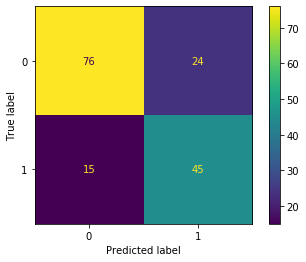

In [173]:
#Plot the confusion matrix
metrics.plot_confusion_matrix(gb_class, X_val_scale, y_val)
plt.show()

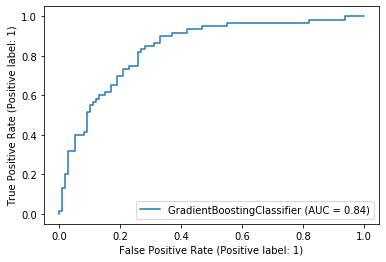

In [174]:
#plot the roc curve
metrics.plot_roc_curve(gb_class, X_val_scale, y_val)
plt.show()

In [175]:
print(metrics.classification_report(y_val,y_pred_gb))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       100
           1       0.65      0.75      0.70        60

    accuracy                           0.76       160
   macro avg       0.74      0.76      0.75       160
weighted avg       0.77      0.76      0.76       160



In [176]:
Feature_importance_gb = pd.DataFrame({"columns":X_train_scale.columns,"feature_importance":gb_class.feature_importances_})

In [177]:
Feature_importance_gb

,columns,feature_importance
0,age,0.152703
1,weight,0.356009
2,bmi,0.189815
3,blood_pressure,0.056554
4,insulin_test,0.060412
5,liver_stress_test,0.107489
6,cardio_stress_test,0.034150
7,years_smoking,0.042868


### `Plot Feature Importance for Gradient Boosting:`

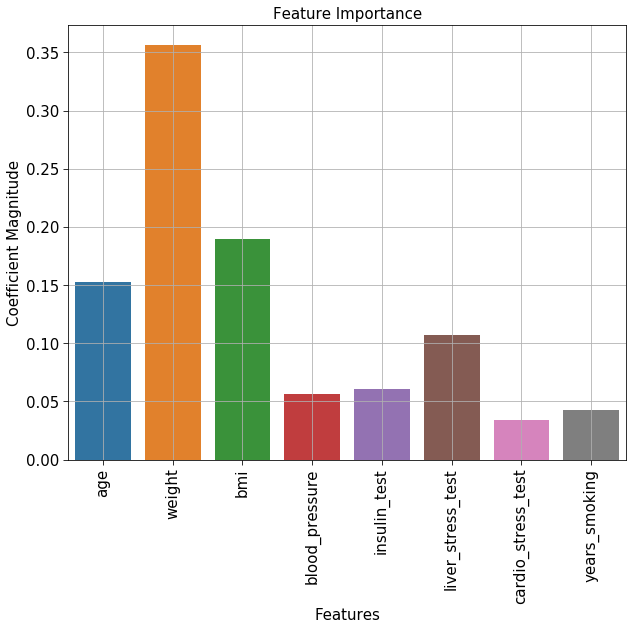

In [178]:
#Plot to show the feature importance
plt.figure(figsize=[10,8])
sns.barplot(x = "columns",y="feature_importance",data=Feature_importance_gb)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### `Findings:`
- Weight,BMI and age are the majot contributor to the final model

### `Calibration:`

In [179]:
prob_true,prob_pred = calibration_curve(y_val,pred_prob[:,1],n_bins=10,)
print(prob_true)
print(prob_pred)


[0.05357143 0.25       0.125      0.4        0.55555556 0.5
 0.44444444 0.58333333 0.66666667 0.82608696]
[0.03436949 0.14339641 0.23889969 0.34760466 0.4282954  0.53274484
 0.65342434 0.76172448 0.85110694 0.95246569]


In [180]:
print("Barrier",metrics.brier_score_loss(y_val, pred_prob[:,1], pos_label=2))

Barrier 0.30643305630764406


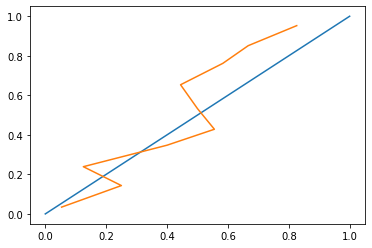

In [181]:
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()

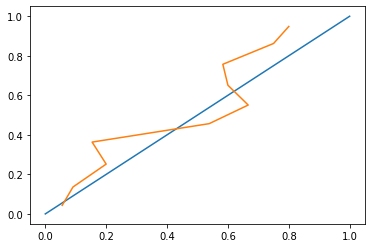

In [182]:
from sklearn.calibration import CalibratedClassifierCV 
calib_model = CalibratedClassifierCV(gb_class, method='sigmoid', cv=5) 
calib_model.fit(X_train_scale, y_train_resample) 
prob = calib_model.predict_proba(X_val_scale)[:, 1]

#plot the calibration curve (see above to know what is it)
prob_true,prob_pred = calibration_curve(y_val, prob, n_bins=10, normalize='True') 
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()


In [183]:
y_pred_gb = calib_model.predict_proba(X_val_scale)
metrics.brier_score_loss(y_val, y_pred_gb[:,1], pos_label=2)

0.2687008073304617

### `Findings:`
- The model is improved with calibration
- barrier loss reduced from 30% to 21%

### XGBoost

In [184]:
xgb_class = xgb.XGBClassifier()
xgb_class.fit(X_train_scale,y_train_resample)

#Model prediction 
y_pred_xgb = xgb_class.predict(X_val_scale)
#Model predict probability
pred_prob = xgb_class.predict_proba(X_val_scale)

[12:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [185]:
df6 = calculate_peformance_testdata("Xgboost",y_val,y_pred_xgb,pred_prob[:,1])

Xgboost:
precision: 0.6417910447761194
recall: 0.7166666666666667
f1_score: 0.6771653543307087
roc_auc: 0.8215


In [186]:
xgb_class.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [187]:
param_grid = dict({"n_estimators":[90,100,110,120],
                    "max_depth": [5,6,7,10,12],
                   "learning_rate":[.2,0.3,.4,0.5]
#                    "gamma":[0.01,0.1,0]
#                    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
                  })

In [188]:
xgb_class_cv = GradientBoostingClassifier(random_state=40)

xgb_clf_rcv = RandomizedSearchCV(xgb_class_cv,param_grid,cv=5,scoring="f1_micro",random_state=40)
xgb_clf_rcv.fit(X_train_scale,y_train_resample)



RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=40),
                   param_distributions={'learning_rate': [0.2, 0.3, 0.4, 0.5],
                                        'max_depth': [5, 6, 7, 10, 12],
                                        'n_estimators': [90, 100, 110, 120]},
                   random_state=40, scoring='f1_micro')

In [189]:
print(xgb_clf_rcv.best_score_)
print(xgb_clf_rcv.best_estimator_)

0.8136165116934346
GradientBoostingClassifier(learning_rate=0.4, max_depth=10, n_estimators=110,
                           random_state=40)


In [190]:
xgb_class = GradientBoostingClassifier(learning_rate=0.4, max_depth=10, n_estimators=110,random_state=40)

In [191]:
xgb_class.fit(X_train_scale,y_train_resample)

#Model prediction 
y_pred_xgb = xgb_class.predict(X_val_scale)
#Model predict probability
pred_prob = xgb_class.predict_proba(X_val_scale)

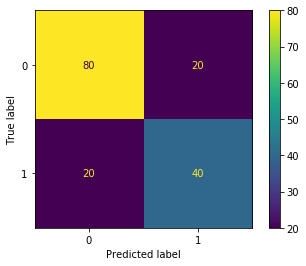

In [192]:
#Plot confusion matrix
metrics.plot_confusion_matrix(xgb_class, X_val_scale, y_val)
plt.show()

In [193]:
print(metrics.classification_report(y_val,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       100
           1       0.67      0.67      0.67        60

    accuracy                           0.75       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.75      0.75      0.75       160



In [194]:
#chekc the scores
df8 = calculate_peformance_testdata("XGBoost",y_val,y_pred_xgb,pred_prob[:,1])

XGBoost:
precision: 0.6666666666666666
recall: 0.6666666666666666
f1_score: 0.6666666666666666
roc_auc: 0.8488333333333333


In [195]:
#add the score to dataframe
score_df= score_df.append(df8)
score_df.drop_duplicates()

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.623188,0.716667,0.666667,0.821167
0,DecisionTree,0.643836,0.783333,0.706767,0.814000
0,RandomForest,0.710145,0.816667,0.759690,0.848333
0,GradientBoosting,0.652174,0.750000,0.697674,0.839500
0,XGBoost,0.666667,0.666667,0.666667,0.848833


In [196]:
Feature_importance_xgb = pd.DataFrame({"columns":X_train_scale.columns,"feature_importance":xgb_class.feature_importances_})

In [197]:
Feature_importance_xgb

,columns,feature_importance
0,age,0.169005
1,weight,0.295380
2,bmi,0.161577
3,blood_pressure,0.102980
4,insulin_test,0.042622
5,liver_stress_test,0.119155
6,cardio_stress_test,0.067776
7,years_smoking,0.041505


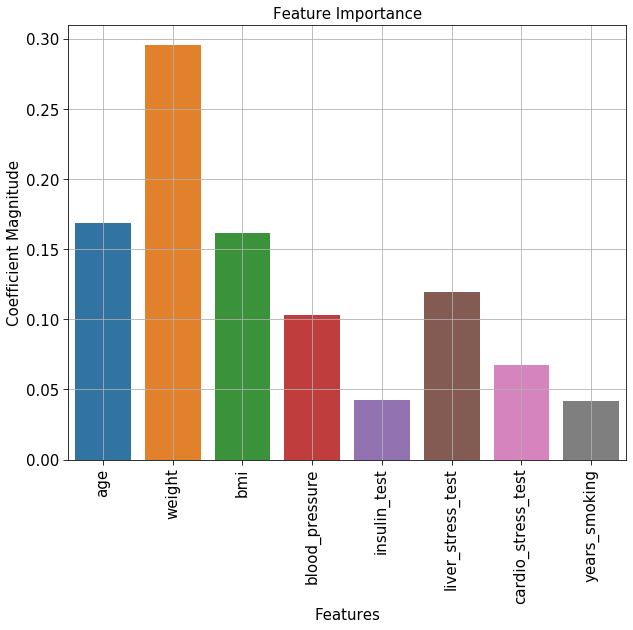

In [198]:
#Plot to show the feature importance
plt.figure(figsize=[10,8])
sns.barplot(x = "columns",y="feature_importance",data=Feature_importance_xgb)
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### `Findings:`
- xgboost shows age,weight and bmi are prime contributors to the final model.

### `Calibration with Xgboost:`

In [199]:
prob_true,prob_pred = calibration_curve(y_val,pred_prob[:,1],n_bins=10)

In [200]:
print("Barrier",metrics.brier_score_loss(y_val, pred_prob[:,1], pos_label=2))

Barrier 0.3613572638140342


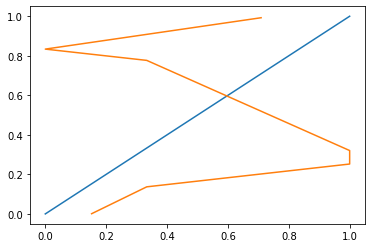

In [201]:
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()

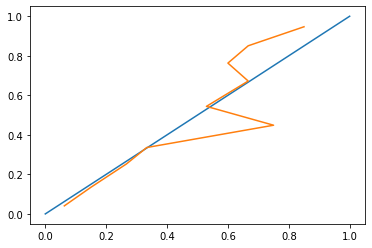

In [202]:
from sklearn.calibration import CalibratedClassifierCV 
calib_model = CalibratedClassifierCV(xgb_class, method='sigmoid', cv=5) 
calib_model.fit(X_train_scale, y_train_resample) 
prob = calib_model.predict_proba(X_val_scale)[:, 1]

#plot the calibration curve (see above to know what is it)
prob_true,prob_pred = calibration_curve(y_val, prob, n_bins=10, normalize='True') 
plt.plot([0, 1], [0, 1]) 
plt.plot(prob_true,prob_pred) 
plt.show()

In [203]:
y_pred_xgb = calib_model.predict_proba(X_val_scale)
metrics.brier_score_loss(y_val, y_pred_xgb[:,1], pos_label=2)

0.24001825476506244

In [204]:
metrics.roc_auc_score(y_val,y_pred_xgb[:,1])

0.846

- Model is improved with calibration.


### `Deep Learning:`
- with 800 datapoints running DL is not a good idea.
- For experiment purpose I have created the model.


In [205]:
X_train_scale.shape[1]

8

In [206]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train_scale.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3), metrics=[Precision(),Recall(),])

In [207]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [208]:
batch_size = 20
num_classes = 2
epochs = 10
tf.random.set_seed(3)

filepath = r'C:\Users\I324158\OneDrive - SAP SE\Desktop\ML\IIITB\Dataset\IIITB Data\Carrier\Modelcheckpoint\model.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint = ModelCheckpoint(filepath=filepath,verbose=1 )
callback = [EarlyStopping(patience=2),model_checkpoint]

In [209]:
tf.random.set_seed(3)
history = model.fit(X_train_scale,y_train_resample,batch_size = batch_size,epochs=epochs,
              validation_data=(X_val_scale, y_val),callbacks=callback,verbose=1   )

Epoch 1/10
37/43 [========================>.....] - ETA: 0s - loss: 0.6760 - precision: 0.5368 - recall: 0.9892
Epoch 00001: saving model to C:\Users\I324158\OneDrive - SAP SE\Desktop\ML\IIITB\Dataset\IIITB Data\Carrier\Modelcheckpoint\model.01-0.66.h5
43/43 [==============================] - 0s 11ms/step - loss: 0.6747 - precision: 0.5463 - recall: 0.9525 - val_loss: 0.6634 - val_precision: 0.5733 - val_recall: 0.7167
Epoch 2/10
36/43 [========================>.....] - ETA: 0s - loss: 0.6267 - precision: 0.6763 - recall: 0.8440
Epoch 00002: saving model to C:\Users\I324158\OneDrive - SAP SE\Desktop\ML\IIITB\Dataset\IIITB Data\Carrier\Modelcheckpoint\model.02-0.63.h5
43/43 [==============================] - 0s 3ms/step - loss: 0.6200 - precision: 0.6849 - recall: 0.8314 - val_loss: 0.6314 - val_precision: 0.5426 - val_recall: 0.8500
Epoch 3/10
36/43 [========================>.....] - ETA: 0s - loss: 0.5457 - precision: 0.7363 - recall: 0.7790
Epoch 00003: saving model to C:\Users\I3241

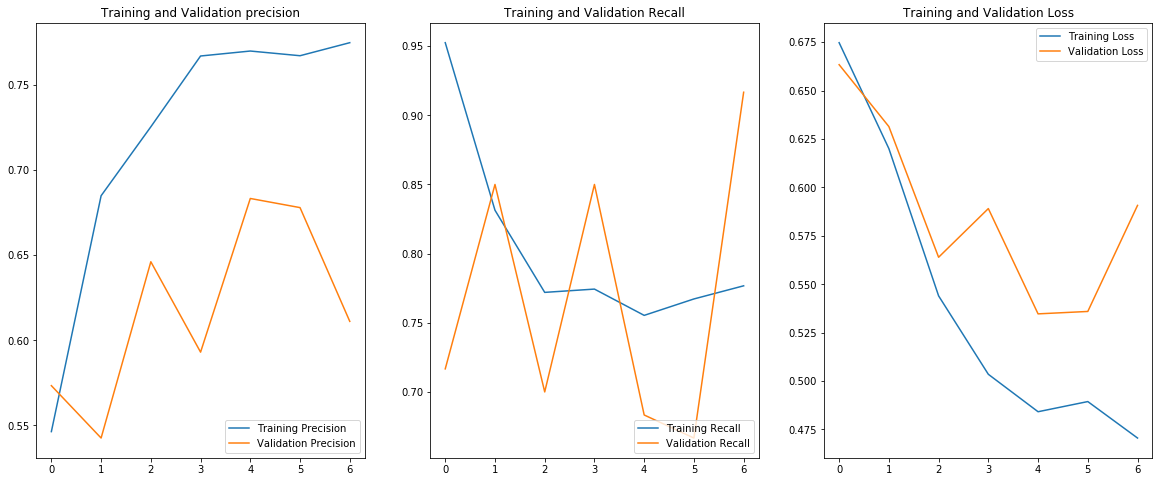

In [210]:
precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']



epochs_range = range(len(precision))

plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, precision, label='Training Precision')
plt.plot(epochs_range, val_precision, label='Validation Precision')
plt.legend(loc='lower right')
plt.title('Training and Validation precision')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, recall, label='Training Recall')
plt.plot(epochs_range, val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')


plt.subplot(1, 3, 3)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### `Hyperparameter Tunning for DeepModel:`


In [211]:
# import kerastuner as kt
# import os

In [212]:
# def build_model(hp):
#     model = Sequential()
#     model.add(Dense(hp.Choice('units', [16,32,64,128]), activation="relu", input_shape=(X_train_scale.shape[1],)))
#     model.add(Dense(20, activation="relu"))
#     # model.add(Dense(40,activation="relu"))
#     model.add(Dense(1,activation="sigmoid"))
#     model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3), metrics=[Precision(),Recall(),])
#     return model



# tuner = kt.RandomSearch(build_model,objective="val_loss",max_trials=5,
#                         directory=os.path.normpath('C:/Users/Downloads/logs'))


In [213]:
# tuner.search(X_train_scale,y_train_resample,epochs=5,validation_data=(X_val_scale, y_val),verbose=1 )

# best_model = tuner.get_best_models()[0]

## `Model Comparison & Final Model:`


In [214]:
#check the validation data performance in all the models
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.623188,0.716667,0.666667,0.821167
0,DecisionTree,0.643836,0.783333,0.706767,0.814000
0,RandomForest,0.710145,0.816667,0.759690,0.848333
0,GradientBoosting,0.652174,0.750000,0.697674,0.839500
0,XGBoost,0.666667,0.666667,0.666667,0.848833


- RandomForest Model has F1 score 75% on validation data 
- Final Model can be built on RandomForest model



### `Final Model on RandomForest:`

In [215]:
rf_class = RandomForestClassifier(min_samples_leaf=3,n_estimators=110,n_jobs=-1,random_state=40)
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_val_scale)
pred_prob = rf_class.predict_proba(X_val_scale)

In [216]:
calculate_peformance_testdata("RandomForest",y_val,y_pred_rf,pred_prob[:,1])

RandomForest:
precision: 0.7101449275362319
recall: 0.8166666666666667
f1_score: 0.7596899224806202
roc_auc: 0.8483333333333334


,Model,precision,recall,f1_score,roc_auc
0,RandomForest,0.710145,0.816667,0.75969,0.848333


In [217]:
#Check distribution of trainning data
train.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [218]:
#check the distirbution of test data ,exlude last null column
test.iloc[:,:8].describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,34.750000,178.800000,34.480000,78.500000,145.050000,1.569600,61.950000,6.050000
std,11.511436,27.935264,6.628773,14.005638,75.964309,0.230356,9.703363,3.471311
min,19.000000,120.000000,25.800000,59.000000,50.000000,1.249800,43.000000,2.000000
25%,26.250000,153.250000,30.250000,69.750000,76.250000,1.411800,55.750000,3.000000
50%,34.500000,188.500000,33.150000,72.500000,137.000000,1.483300,60.000000,5.500000
75%,44.250000,197.750000,37.600000,89.250000,167.750000,1.737800,68.000000,7.500000
max,60.000000,216.000000,50.700000,108.000000,362.000000,2.050800,83.000000,13.000000


In [219]:
#Check the scaled test data already performed
X_test_scale.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,0.065934,0.234043,0.471924,0.439490,0.066852,0.374681,0.301075,0.105263
1,0.098901,0.382979,0.424134,0.566879,0.144847,0.453877,0.231183,0.157895
2,0.175824,0.212766,0.321386,0.484076,0.068709,0.464377,0.284946,0.052632
3,0.186813,0.526596,0.387097,0.464968,0.117920,0.393880,0.327957,0.157895
4,0.461538,0.457447,0.356033,0.394904,0.178273,0.489576,0.349462,0.236842


In [220]:
y_pred = rf_class.predict(X_test_scale)
y_pred_prob = rf_class.predict_proba(X_test_scale)

In [221]:
test["zeta_disease"] = y_pred
test["disease_prob"] = y_pred_prob[:,1]

- __The thresold of probability for positve class is taken as 0.5.__

In [222]:
test

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,disease_prob
0,24,151,39.5,69,72,1.3968,56,4,0,0.447554
1,27,179,35.5,89,156,1.6608,43,6,1,0.628402
2,34,147,26.9,76,74,1.6958,53,2,0,0.277814
3,35,206,32.4,73,127,1.4608,61,6,1,0.849373
4,60,193,29.8,62,192,1.7798,65,9,1,0.596361
5,45,120,36.5,108,50,1.2978,54,12,0,0.387637
6,20,139,38.2,61,77,1.5818,68,3,0,0.313712
7,23,137,31.2,70,73,1.4168,59,7,0,0.395577
8,36,195,30.5,59,141,1.4498,59,6,1,0.715470
9,19,193,25.8,84,66,1.7938,50,3,0,0.159964


In [223]:
test.to_csv("S_zeta-disease_prediction-data_S.csv")

### `Save the Model:`

In [224]:
saved_model = pickle.dumps(rf_class)